In [25]:
from dist_analy.pypdb import Query, get_pdb_file
from dist_analy.dist_analy import get_shortest_dist_matrix, get_ca_dist_matrix
import dist_analy.import_pdb
import dist_analy.pca
from sklearn import decomposition
import dist_analy.pca
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
egfr_uniprot = 'P00533'
# editted pypdb to search by uniprot accession ... will need to submit a pull request eventually

found_pdbs = Query(egfr_uniprot, query_type="uniprot").search()

In [27]:
print(found_pdbs)

['1IVO', '1M14', '1M17', '1MOX', '1NQL', '1XKK', '1YY9', '1Z9I', '2EB2', '2EB3', '2GS2', '2GS6', '2GS7', '2ITN', '2ITO', '2ITP', '2ITQ', '2ITT', '2ITU', '2ITV', '2ITW', '2ITX', '2ITY', '2ITZ', '2J5E', '2J5F', '2J6M', '2JIT', '2JIU', '2JIV', '2KS1', '2M0B', '2M20', '2N5S', '2RF9', '2RFD', '2RFE', '2RGP', '3B2U', '3B2V', '3BEL', '3BUO', '3C09', '3G5V', '3G5Y', '3GOP', '3GT8', '3IKA', '3LZB', '3NJP', '3OB2', '3OP0', '3P0Y', '3PFV', '3POZ', '3QWQ', '3UG1', '3UG2', '3VJN', '3VJO', '3VRP', '3VRR', '3W2O', '3W2P', '3W2Q', '3W2R', '3W2S', '3W32', '3W33', '4G5J', '4G5P', '4HJO', '4I1Z', '4I20', '4I21', '4I22', '4I23', '4I24', '4JQ7', '4JQ8', '4JR3', '4JRV', '4KRL', '4KRM', '4KRO', '4KRP', '4LI5', '4LL0', '4LQM', '4LRM', '4R3P', '4R3R', '4R5S', '4RIW', '4RIX', '4RIY', '4RJ4', '4RJ5', '4RJ6', '4RJ7', '4RJ8', '4TKS', '4UIP', '4UV7', '4WD5', '4WKQ', '4WRG', '4ZAU', '4ZJV', '4ZSE', '5C8K', '5C8M', '5C8N', '5CAL', '5CAN', '5CAO', '5CAP', '5CAQ', '5CAS', '5CAU', '5CAV', '5CNN', '5CNO', '5CZH', '5CZI',

In [28]:
outdir = './datafiles/raw_pdb/'
for pdb in found_pdbs:
    pdb_file = get_pdb_file(pdb, filetype='pdb', compression=False)
    fn = outdir + pdb + ".pdb"
    print(fn)
    with open(fn,'w') as f1:
        f1.write(pdb_file)
    

./datafiles/raw_pdb/1IVO.pdb
./datafiles/raw_pdb/1M14.pdb
./datafiles/raw_pdb/1M17.pdb
./datafiles/raw_pdb/1MOX.pdb
./datafiles/raw_pdb/1NQL.pdb
./datafiles/raw_pdb/1XKK.pdb
./datafiles/raw_pdb/1YY9.pdb
./datafiles/raw_pdb/1Z9I.pdb
./datafiles/raw_pdb/2EB2.pdb
./datafiles/raw_pdb/2EB3.pdb
./datafiles/raw_pdb/2GS2.pdb
./datafiles/raw_pdb/2GS6.pdb
./datafiles/raw_pdb/2GS7.pdb
./datafiles/raw_pdb/2ITN.pdb
./datafiles/raw_pdb/2ITO.pdb
./datafiles/raw_pdb/2ITP.pdb
./datafiles/raw_pdb/2ITQ.pdb
./datafiles/raw_pdb/2ITT.pdb
./datafiles/raw_pdb/2ITU.pdb
./datafiles/raw_pdb/2ITV.pdb
./datafiles/raw_pdb/2ITW.pdb
./datafiles/raw_pdb/2ITX.pdb
./datafiles/raw_pdb/2ITY.pdb
./datafiles/raw_pdb/2ITZ.pdb
./datafiles/raw_pdb/2J5E.pdb
./datafiles/raw_pdb/2J5F.pdb
./datafiles/raw_pdb/2J6M.pdb
./datafiles/raw_pdb/2JIT.pdb
./datafiles/raw_pdb/2JIU.pdb
./datafiles/raw_pdb/2JIV.pdb
./datafiles/raw_pdb/2KS1.pdb
./datafiles/raw_pdb/2M0B.pdb
./datafiles/raw_pdb/2M20.pdb
./datafiles/raw_pdb/2N5S.pdb
./datafiles/ra

In [29]:
%%timeit
pdb_proc = dist_analy.import_pdb.PDB_Processer()
pdb_list = pdb_proc.process_pdb('1M14.pdb', pdb_dir, proc_dir, egfr_uniprot)


{'GLY', 'HIS', 'GLU', 'LYS', 'VAL', 'ASP', 'PTR', 'THR', 'LEU', 'ILE', 'ARG', 'ASN', 'PHE', 'PRO', 'KCX', 'OCS', 'MET', 'TRP', 'CSD', 'ALY', 'GLN', 'ALA', 'TYR', 'TPO', 'CYS', 'SER'}
{'GLY', 'HIS', 'GLU', 'LYS', 'VAL', 'ASP', 'PTR', 'THR', 'LEU', 'ILE', 'ARG', 'ASN', 'PHE', 'PRO', 'KCX', 'OCS', 'MET', 'TRP', 'CSD', 'ALY', 'GLN', 'ALA', 'TYR', 'TPO', 'CYS', 'SER'}
{'GLY', 'HIS', 'GLU', 'LYS', 'VAL', 'ASP', 'PTR', 'THR', 'LEU', 'ILE', 'ARG', 'ASN', 'PHE', 'PRO', 'KCX', 'OCS', 'MET', 'TRP', 'CSD', 'ALY', 'GLN', 'ALA', 'TYR', 'TPO', 'CYS', 'SER'}
{'GLY', 'HIS', 'GLU', 'LYS', 'VAL', 'ASP', 'PTR', 'THR', 'LEU', 'ILE', 'ARG', 'ASN', 'PHE', 'PRO', 'KCX', 'OCS', 'MET', 'TRP', 'CSD', 'ALY', 'GLN', 'ALA', 'TYR', 'TPO', 'CYS', 'SER'}
{'GLY', 'HIS', 'GLU', 'LYS', 'VAL', 'ASP', 'PTR', 'THR', 'LEU', 'ILE', 'ARG', 'ASN', 'PHE', 'PRO', 'KCX', 'OCS', 'MET', 'TRP', 'CSD', 'ALY', 'GLN', 'ALA', 'TYR', 'TPO', 'CYS', 'SER'}
{'GLY', 'HIS', 'GLU', 'LYS', 'VAL', 'ASP', 'PTR', 'THR', 'LEU', 'ILE', 'ARG', 'ASN', 

In [34]:
pdb_dir = './datafiles/raw_pdb/'
proc_dir = './datafiles/processed_pdb/'
EGFR_KLIFS_IDENT = [582, 584, 587, 591, 592, 595, 596, 617, 620, 624, 628, 636, 669, 683, 690, 691, 692, 694, 700, 705, 706, 708, 711, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 731, 733, 735, 736, 740, 741, 742, 743, 744, 745, 746, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 771, 772, 773, 774, 775, 776, 777, 778, 779, 781, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 810, 814, 815, 816, 817, 820, 821, 822, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 848, 851, 852, 853, 854, 855, 856, 857, 858, 859, 862, 875, 877, 878, 879, 880, 882, 883, 884, 886, 892, 895, 896, 897, 898, 901, 902, 903, 905, 906, 909, 911, 914, 928, 930, 933, 935, 936, 938, 939, 942, 944, 950, 951, 954, 958, 959, 961, 964, 968, 973, 974, 975, 977, 981]
proc_pdb_list = []
NCAA = ['PTR', 'SEP', 'CSX', 'CY0']
pdb_proc = dist_analy.import_pdb.PDB_Processer(NCAA)
for pdb_fn in found_pdbs:
    pdb_list = pdb_proc.process_pdb(pdb_fn+'.pdb', pdb_dir, proc_dir, egfr_uniprot)
    for proc in pdb_list:
        print(proc)
        proc_pdb_list.append(proc)

{'GLY', 'HIS', 'GLU', 'LYS', 'VAL', 'ASP', 'PTR', 'THR', 'LEU', 'ILE', 'ARG', 'ASN', 'PHE', 'PRO', 'KCX', 'OCS', 'CY0', 'SEP', 'CSX', 'MET', 'TRP', 'CSD', 'ALY', 'GLN', 'ALA', 'TYR', 'TPO', 'CYS', 'SER'}
1IVO_A.pdb
1IVO_B.pdb
1M14_A.pdb
1M17_A.pdb
1MOX_A.pdb
1MOX_B.pdb
1NQL_A.pdb
1XKK_A.pdb


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 1YY9 entity #2, skipping
unable to find data with 1YY9 entity #3, skipping
1YY9_A.pdb
1Z9I_A_0.pdb
1Z9I_A_1.pdb
1Z9I_A_2.pdb
1Z9I_A_3.pdb
1Z9I_A_4.pdb
1Z9I_A_5.pdb
1Z9I_A_6.pdb
1Z9I_A_7.pdb
1Z9I_A_8.pdb
1Z9I_A_9.pdb
1Z9I_A_10.pdb
1Z9I_A_11.pdb
1Z9I_A_12.pdb
1Z9I_A_13.pdb
1Z9I_A_14.pdb
1Z9I_A_15.pdb
1Z9I_A_16.pdb
1Z9I_A_17.pdb
1Z9I_A_18.pdb
1Z9I_A_19.pdb
1Z9I_A_20.pdb
1Z9I_A_21.pdb
1Z9I_A_22.pdb
1Z9I_A_23.pdb
1Z9I_A_24.pdb
2EB2_A.pdb
2EB3_A.pdb
2GS2_A.pdb
unable to find data with 2GS6 entity #2, skipping


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


2GS6_A.pdb
2GS7_A.pdb
2GS7_B.pdb
2ITN_A.pdb
2ITO_A.pdb
2ITP_A.pdb
2ITQ_A.pdb
2ITT_A.pdb
2ITU_A.pdb
2ITV_A.pdb
2ITW_A.pdb
2ITX_A.pdb
2ITY_A.pdb
2ITZ_A.pdb
2J5E_A.pdb
2J5F_A.pdb
2J6M_A.pdb
2JIT_A.pdb
2JIT_B.pdb
2JIU_A.pdb
2JIU_B.pdb
2JIV_A.pdb
2JIV_B.pdb
2KS1_B_0.pdb
2KS1_B_1.pdb
2KS1_B_2.pdb
2KS1_B_3.pdb
2KS1_B_4.pdb
2KS1_B_5.pdb
2KS1_B_6.pdb
2KS1_B_7.pdb
2KS1_B_8.pdb
2KS1_B_9.pdb
2KS1_B_10.pdb
2KS1_B_11.pdb
2M0B_A_0.pdb
2M0B_A_1.pdb
2M0B_A_2.pdb
2M0B_A_3.pdb
2M0B_A_4.pdb
2M0B_A_5.pdb
2M0B_A_6.pdb
2M0B_A_7.pdb
2M0B_A_8.pdb
2M0B_A_9.pdb
2M0B_A_10.pdb
2M0B_A_11.pdb
2M0B_A_12.pdb
2M0B_A_13.pdb
2M0B_A_14.pdb
2M0B_A_15.pdb
2M0B_A_16.pdb
2M0B_A_17.pdb
2M0B_A_18.pdb
2M0B_A_19.pdb
2M0B_B_0.pdb
2M0B_B_1.pdb
2M0B_B_2.pdb
2M0B_B_3.pdb
2M0B_B_4.pdb
2M0B_B_5.pdb
2M0B_B_6.pdb
2M0B_B_7.pdb
2M0B_B_8.pdb
2M0B_B_9.pdb
2M0B_B_10.pdb
2M0B_B_11.pdb
2M0B_B_12.pdb
2M0B_B_13.pdb
2M0B_B_14.pdb
2M0B_B_15.pdb
2M0B_B_16.pdb
2M0B_B_17.pdb
2M0B_B_18.pdb
2M0B_B_19.pdb
2M20_A_0.pdb
2M20_A_1.pdb
2M20_A_2.pdb
2M20_A_3.p

C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 3B2U entity #1, skipping
3B2U_A.pdb
3B2U_B.pdb
3B2U_E.pdb
3B2U_I.pdb
3B2U_M.pdb
3B2U_P.pdb
3B2U_S.pdb
3B2U_V.pdb
unable to find data with 3B2V entity #1, skipping


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


3B2V_A.pdb
3BEL_A.pdb
3BUO_A.pdb
3BUO_C.pdb
unable to find data with 3C09 entity #1, skipping


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 3C09 entity #2, skipping
3C09_A.pdb
3C09_D.pdb
unable to find data with 3G5V entity #1, skipping


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 3G5V entity #2, skipping
3G5V_C.pdb


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 3G5Y entity #1, skipping
unable to find data with 3G5Y entity #2, skipping
3G5Y_E.pdb
3GOP_A.pdb


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 3GT8 entity #2, skipping
3GT8_B.pdb
3GT8_A.pdb
3GT8_C.pdb
3GT8_D.pdb
3IKA_A.pdb
3IKA_B.pdb
3LZB_A.pdb
3LZB_B.pdb
3LZB_C.pdb
3LZB_D.pdb
3LZB_E.pdb
3LZB_F.pdb
3LZB_G.pdb
3LZB_H.pdb
3NJP_A.pdb
3NJP_B.pdb
3OB2_A.pdb
3OP0_C.pdb
3OP0_D.pdb


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 3P0Y entity #2, skipping
unable to find data with 3P0Y entity #3, skipping
3P0Y_A.pdb
3PFV_C.pdb
3PFV_D.pdb
3POZ_A.pdb


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 3QWQ entity #2, skipping
3QWQ_A.pdb
3UG1_A.pdb
3UG2_A.pdb
3VJN_A.pdb
3VJO_A.pdb
3VRP_B.pdb
3VRR_C.pdb
3W2O_A.pdb
3W2P_A.pdb
3W2Q_A.pdb
3W2R_A.pdb
3W2S_A.pdb
3W32_A.pdb
3W33_A.pdb
4G5J_A.pdb
4G5P_A.pdb
4G5P_B.pdb
4HJO_A.pdb
4I1Z_A.pdb
4I20_A.pdb
4I21_A.pdb
4I21_B.pdb
4I22_A.pdb
4I23_A.pdb
4I24_A.pdb
4I24_B.pdb
4JQ7_A.pdb
4JQ8_A.pdb
4JR3_A.pdb
4JRV_A.pdb
unable to find data with 4KRL entity #1, skipping


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


4KRL_A.pdb


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 4KRM entity #2, skipping
4KRM_A.pdb
4KRM_C.pdb
4KRM_E.pdb
4KRM_G.pdb
4KRM_I.pdb
4KRM_K.pdb


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 4KRO entity #2, skipping
unable to find data with 4KRO entity #3, skipping
unable to find data with 4KRO entity #4, skipping
4KRO_A.pdb


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 4KRP entity #2, skipping
unable to find data with 4KRP entity #3, skipping
unable to find data with 4KRP entity #4, skipping
4KRP_A.pdb
4LI5_A.pdb
4LL0_A.pdb
4LL0_B.pdb
4LQM_A.pdb
4LRM_A.pdb
4LRM_B.pdb
4LRM_C.pdb
4LRM_D.pdb
4LRM_E.pdb
4R3P_A.pdb
4R3R_A.pdb
4R5S_A.pdb
4RIW_B.pdb
4RIW_D.pdb
4RIX_B.pdb
4RIX_D.pdb
4RIY_B.pdb
4RIY_D.pdb
4RJ4_A.pdb
4RJ5_A.pdb
4RJ6_A.pdb
4RJ7_A.pdb
4RJ8_A.pdb
4TKS_A.pdb
4UIP_A.pdb


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 4UV7 entity #2, skipping
unable to find data with 4UV7 entity #3, skipping
4UV7_A.pdb
4WD5_A.pdb
4WD5_B.pdb
4WKQ_A.pdb
4WRG_A.pdb
4ZAU_A.pdb
4ZJV_A.pdb
4ZJV_B.pdb
4ZSE_A.pdb
4ZSE_B.pdb
4ZSE_C.pdb
4ZSE_D.pdb
5C8K_A.pdb
5C8M_A.pdb
5C8N_A.pdb
5CAL_A.pdb
5CAN_A.pdb
5CAO_A.pdb
5CAP_A.pdb
5CAQ_A.pdb
5CAS_A.pdb
5CAU_A.pdb
5CAV_A.pdb
5CNN_A.pdb
5CNN_B.pdb
5CNO_A.pdb
5CNO_B.pdb
5CNO_X.pdb
unable to find data with 5CZH entity #2, skipping


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


5CZH_A.pdb
5CZI_A.pdb
5D41_A.pdb
5D41_B.pdb
5EDP_A.pdb
5EDQ_A.pdb
5EDR_A.pdb
5EM5_A.pdb
5EM6_A.pdb
5EM7_A.pdb
5EM8_A.pdb
5FED_A.pdb
5FEE_A.pdb
5FEQ_A.pdb
5GMP_A.pdb
5GNK_A.pdb
5GTY_A.pdb
5GTY_B.pdb
5GTY_D.pdb
5GTY_E.pdb
5GTY_F.pdb
5GTY_G.pdb
5GTY_H.pdb
5GTY_C.pdb
5GTZ_A.pdb
5HCX_A.pdb
5HCY_A.pdb
5HCZ_A.pdb
5HG5_A.pdb
5HG7_A.pdb
5HG8_A.pdb
5HG9_A.pdb
5HIB_A.pdb
5HIC_A.pdb
5J9Y_A.pdb
5J9Z_A.pdb
5JEB_A.pdb
5LV6_A_0.pdb
5LV6_A_1.pdb
5LV6_A_2.pdb
5LV6_A_3.pdb
5LV6_A_4.pdb
5LV6_A_5.pdb
5LV6_A_6.pdb
5LV6_A_7.pdb
5LV6_A_8.pdb
5LV6_A_9.pdb
5LV6_A_10.pdb
5LV6_A_11.pdb
5LV6_A_12.pdb
5LV6_A_13.pdb
5LV6_A_14.pdb
5LV6_A_15.pdb
5LV6_A_16.pdb
5LV6_A_17.pdb
5LV6_A_18.pdb
5LV6_A_19.pdb
5LV6_B_0.pdb
5LV6_B_1.pdb
5LV6_B_2.pdb
5LV6_B_3.pdb
5LV6_B_4.pdb
5LV6_B_5.pdb
5LV6_B_6.pdb
5LV6_B_7.pdb
5LV6_B_8.pdb
5LV6_B_9.pdb
5LV6_B_10.pdb
5LV6_B_11.pdb
5LV6_B_12.pdb
5LV6_B_13.pdb
5LV6_B_14.pdb
5LV6_B_15.pdb
5LV6_B_16.pdb
5LV6_B_17.pdb
5LV6_B_18.pdb
5LV6_B_19.pdb


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 5SX4 entity #1, skipping
unable to find data with 5SX4 entity #2, skipping
5SX4_M.pdb
5SX4_N.pdb


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 5SX5 entity #1, skipping
unable to find data with 5SX5 entity #2, skipping
5SX5_M.pdb
5SX5_N.pdb
5U8L_A.pdb
5UG8_A.pdb
5UG9_A.pdb
5UGA_A.pdb
5UGB_A.pdb
5UGC_A.pdb
5UWD_A.pdb
5WB7_A.pdb
5WB7_B.pdb
5WB7_C.pdb
5WB7_D.pdb
5WB8_A.pdb
5WB8_D.pdb
5X26_A.pdb
5X27_A.pdb
5X28_A.pdb
5X2A_A.pdb
5X2A_B.pdb
5X2A_C.pdb
5X2A_D.pdb
5X2C_A.pdb
5X2C_B.pdb
5X2F_A.pdb
5X2F_B.pdb
5X2F_C.pdb
5X2F_D.pdb
5X2K_A.pdb
5XDK_A.pdb
5XDL_A.pdb
5XGM_A.pdb
5XGN_A.pdb
5XGN_B.pdb


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 5XWD entity #2, skipping
unable to find data with 5XWD entity #3, skipping
5XWD_A.pdb
5Y25_A.pdb
5Y9T_A.pdb
5YU9_A.pdb
5YU9_B.pdb
5YU9_C.pdb
5YU9_D.pdb
5ZTO_A.pdb
5ZWJ_A.pdb
6ARU_A.pdb


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 6B3S entity #2, skipping
unable to find data with 6B3S entity #3, skipping
6B3S_A.pdb
6B3S_B.pdb
6B3S_E.pdb
6B3S_I.pdb
6D8E_A.pdb
6DUK_A.pdb
6DUK_B.pdb
6DUK_C.pdb
6DUK_D.pdb
6DUK_E.pdb
6DUK_F.pdb
6JRJ_A.pdb
6JRK_A.pdb
6JRX_A.pdb
6JWL_A.pdb
6JX0_A.pdb
6JX4_A.pdb
6JXT_A.pdb
6JZ0_A.pdb
6LUB_A.pdb
6LUD_A.pdb
6P1D_D.pdb
6P1D_A.pdb
6P1D_B.pdb
6P1D_C.pdb
6P1L_A.pdb
6P1L_B.pdb
6P1L_C.pdb
6P1L_D.pdb
6P8Q_A.pdb
6P8Q_B.pdb
6P8Q_C.pdb
6P8Q_D.pdb
6S89_A.pdb
6S8A_A.pdb
6S9B_A.pdb
6S9C_A.pdb
6S9D_A.pdb
6TFU_A.pdb
6TFU_B.pdb
6TFV_A.pdb
6TFV_B.pdb
6TFW_A.pdb
6TFW_B.pdb
6TFY_A.pdb
6TFY_B.pdb
6TFZ_A.pdb
6TFZ_B.pdb
6TG0_A.pdb
6TG0_B.pdb
6TG1_A.pdb
6TG1_B.pdb
6V5N_D.pdb
6V5N_A.pdb
6V5N_B.pdb
6V5N_C.pdb
6V5P_A.pdb
6V5P_B.pdb
6V5P_C.pdb
6V5P_D.pdb
6V66_D.pdb
6V66_A.pdb
6V66_B.pdb
6V66_C.pdb
6V6K_D.pdb
6V6K_A.pdb
6V6K_B.pdb
6V6K_C.pdb
6V6K_E.pdb
6V6K_F.pdb
6V6K_G.pdb
6V6K_H.pdb
6V6O_D.pdb
6V6O_A.pdb
6V6O_B.pdb
6V6O_C.pdb
6V6O_E.pdb
6V6O_F.pdb
6V6O_G.pdb
6V6O_H.pdb
6VH4_A.pdb
6VHN_A.pd

In [37]:
dist_mat_list = []
dist_mat_pdb = []
NCAA = ['PTR', 'SEP', 'CSX', 'CY0']
pdb_proc = dist_analy.import_pdb.PDB_Processer(NCAA)
for pdb_fn in found_pdbs:     
    pdb_list = pdb_proc.process_pdb(pdb_fn+'.pdb', pdb_dir, proc_dir, egfr_uniprot)
    for proc in pdb_list:
        pdb = proc.split('.')[0]
        chain = proc.split(".")[0].split("_")[-1]
        print(proc_dir+proc, chain)
        try:
            dist_mat = get_shortest_dist_matrix(proc_dir+proc, EGFR_KLIFS_IDENT, chain)
            dist_mat_list.append(dist_mat)
            dist_mat_pdb.append(pdb)
        except AttributeError:
            print('problematic pdb file')

        

{'GLY', 'HIS', 'GLU', 'LYS', 'VAL', 'ASP', 'PTR', 'THR', 'LEU', 'ILE', 'ARG', 'ASN', 'PHE', 'PRO', 'KCX', 'OCS', 'CY0', 'SEP', 'CSX', 'MET', 'TRP', 'CSD', 'ALY', 'GLN', 'ALA', 'TYR', 'TPO', 'CYS', 'SER'}


@> 3956 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3947 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/1IVO_A.pdb A
./datafiles/processed_pdb/1IVO_B.pdb B


@> 2452 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1M14_A.pdb A


@> 2497 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1M17_A.pdb A


@> 3820 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3844 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/1MOX_A.pdb A
./datafiles/processed_pdb/1MOX_B.pdb B


@> 4597 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/1NQL_A.pdb A


@> 2249 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1XKK_A.pdb A


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 1YY9 entity #2, skipping
unable to find data with 1YY9 entity #3, skipping


@> 4653 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/1YY9_A.pdb A


@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please 

./datafiles/processed_pdb/1Z9I_A_0.pdb 0
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_1.pdb 1
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_2.pdb 2
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_3.pdb 3
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_4.pdb 4
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_5.pdb 5
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_6.pdb 6
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_7.pdb 7
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_8.pdb 8
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_9.pdb 9
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_10.pdb 10
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_11.pdb 11
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_12.pdb 12
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_13.pdb 13
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_14.pdb 14
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_15.pdb 15


@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.


problematic pdb file
./datafiles/processed_pdb/1Z9I_A_16.pdb 16
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_17.pdb 17
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_18.pdb 18
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_19.pdb 19
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_20.pdb 20
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_21.pdb 21
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_22.pdb 22
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_23.pdb 23
problematic pdb file
./datafiles/processed_pdb/1Z9I_A_24.pdb 24
problematic pdb file


@> 2443 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2EB2_A.pdb A


@> 2365 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2EB3_A.pdb A


@> 2419 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2GS2_A.pdb A


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 2GS6 entity #2, skipping


@> 2465 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2GS6_A.pdb A


@> 2227 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2GS7_A.pdb A


@> 2278 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2GS7_B.pdb B


@> 2415 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2ITN_A.pdb A


@> 2419 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2ITO_A.pdb A


@> 2442 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2ITP_A.pdb A


@> 2400 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2ITQ_A.pdb A


@> 2413 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2ITT_A.pdb A


@> 2417 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2ITU_A.pdb A


@> 2417 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2ITV_A.pdb A


@> 2395 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2ITW_A.pdb A


@> 2448 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2ITX_A.pdb A


@> 2396 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2ITY_A.pdb A


@> 2415 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2ITZ_A.pdb A


@> 2483 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2J5E_A.pdb A


@> 2447 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2J5F_A.pdb A


@> 2433 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/2J6M_A.pdb A


@> 2363 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2JIT_A.pdb A


@> 2450 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2JIT_B.pdb B


@> 2380 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2JIU_A.pdb A


@> 2407 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2JIU_B.pdb B


@> 2137 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2JIV_A.pdb A


@> 2140 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2JIV_B.pdb B


@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.


./datafiles/processed_pdb/2KS1_B_0.pdb 0
problematic pdb file
./datafiles/processed_pdb/2KS1_B_1.pdb 1
problematic pdb file
./datafiles/processed_pdb/2KS1_B_2.pdb 2
problematic pdb file
./datafiles/processed_pdb/2KS1_B_3.pdb 3
problematic pdb file
./datafiles/processed_pdb/2KS1_B_4.pdb 4
problematic pdb file
./datafiles/processed_pdb/2KS1_B_5.pdb 5
problematic pdb file
./datafiles/processed_pdb/2KS1_B_6.pdb 6
problematic pdb file
./datafiles/processed_pdb/2KS1_B_7.pdb 7
problematic pdb file
./datafiles/processed_pdb/2KS1_B_8.pdb 8
problematic pdb file
./datafiles/processed_pdb/2KS1_B_9.pdb 9
problematic pdb file
./datafiles/processed_pdb/2KS1_B_10.pdb 10
problematic pdb file
./datafiles/processed_pdb/2KS1_B_11.pdb 11
problematic pdb file


@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please 

./datafiles/processed_pdb/2M0B_A_0.pdb 0
problematic pdb file
./datafiles/processed_pdb/2M0B_A_1.pdb 1
problematic pdb file
./datafiles/processed_pdb/2M0B_A_2.pdb 2
problematic pdb file
./datafiles/processed_pdb/2M0B_A_3.pdb 3
problematic pdb file
./datafiles/processed_pdb/2M0B_A_4.pdb 4
problematic pdb file
./datafiles/processed_pdb/2M0B_A_5.pdb 5
problematic pdb file
./datafiles/processed_pdb/2M0B_A_6.pdb 6
problematic pdb file
./datafiles/processed_pdb/2M0B_A_7.pdb 7
problematic pdb file
./datafiles/processed_pdb/2M0B_A_8.pdb 8
problematic pdb file
./datafiles/processed_pdb/2M0B_A_9.pdb 9
problematic pdb file
./datafiles/processed_pdb/2M0B_A_10.pdb 10
problematic pdb file
./datafiles/processed_pdb/2M0B_A_11.pdb 11
problematic pdb file
./datafiles/processed_pdb/2M0B_A_12.pdb 12
problematic pdb file
./datafiles/processed_pdb/2M0B_A_13.pdb 13
problematic pdb file
./datafiles/processed_pdb/2M0B_A_14.pdb 14
problematic pdb file
./datafiles/processed_pdb/2M0B_A_15.pdb 15
problematic pdb f

@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please 

problematic pdb file
./datafiles/processed_pdb/2M0B_A_19.pdb 19
problematic pdb file
./datafiles/processed_pdb/2M0B_B_0.pdb 0
problematic pdb file
./datafiles/processed_pdb/2M0B_B_1.pdb 1
problematic pdb file
./datafiles/processed_pdb/2M0B_B_2.pdb 2
problematic pdb file
./datafiles/processed_pdb/2M0B_B_3.pdb 3
problematic pdb file
./datafiles/processed_pdb/2M0B_B_4.pdb 4
problematic pdb file
./datafiles/processed_pdb/2M0B_B_5.pdb 5
problematic pdb file
./datafiles/processed_pdb/2M0B_B_6.pdb 6
problematic pdb file
./datafiles/processed_pdb/2M0B_B_7.pdb 7
problematic pdb file
./datafiles/processed_pdb/2M0B_B_8.pdb 8
problematic pdb file
./datafiles/processed_pdb/2M0B_B_9.pdb 9
problematic pdb file
./datafiles/processed_pdb/2M0B_B_10.pdb 10
problematic pdb file
./datafiles/processed_pdb/2M0B_B_11.pdb 11
problematic pdb file
./datafiles/processed_pdb/2M0B_B_12.pdb 12
problematic pdb file
./datafiles/processed_pdb/2M0B_B_13.pdb 13
problematic pdb file
./datafiles/processed_pdb/2M0B_B_14.pdb

@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.


problematic pdb file
./datafiles/processed_pdb/2M0B_B_16.pdb 16
problematic pdb file
./datafiles/processed_pdb/2M0B_B_17.pdb 17
problematic pdb file
./datafiles/processed_pdb/2M0B_B_18.pdb 18
problematic pdb file
./datafiles/processed_pdb/2M0B_B_19.pdb 19
problematic pdb file


@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please 

./datafiles/processed_pdb/2M20_A_0.pdb 0
problematic pdb file
./datafiles/processed_pdb/2M20_A_1.pdb 1
problematic pdb file
./datafiles/processed_pdb/2M20_A_2.pdb 2
problematic pdb file
./datafiles/processed_pdb/2M20_A_3.pdb 3
problematic pdb file
./datafiles/processed_pdb/2M20_A_4.pdb 4
problematic pdb file
./datafiles/processed_pdb/2M20_A_5.pdb 5
problematic pdb file
./datafiles/processed_pdb/2M20_A_6.pdb 6
problematic pdb file
./datafiles/processed_pdb/2M20_A_7.pdb 7
problematic pdb file
./datafiles/processed_pdb/2M20_A_8.pdb 8
problematic pdb file
./datafiles/processed_pdb/2M20_A_9.pdb 9
problematic pdb file
./datafiles/processed_pdb/2M20_B_0.pdb 0
problematic pdb file
./datafiles/processed_pdb/2M20_B_1.pdb 1
problematic pdb file
./datafiles/processed_pdb/2M20_B_2.pdb 2
problematic pdb file
./datafiles/processed_pdb/2M20_B_3.pdb 3
problematic pdb file
./datafiles/processed_pdb/2M20_B_4.pdb 4
problematic pdb file
./datafiles/processed_pdb/2M20_B_5.pdb 5


@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.


problematic pdb file
./datafiles/processed_pdb/2M20_B_6.pdb 6
problematic pdb file
./datafiles/processed_pdb/2M20_B_7.pdb 7
problematic pdb file
./datafiles/processed_pdb/2M20_B_8.pdb 8
problematic pdb file
./datafiles/processed_pdb/2M20_B_9.pdb 9
problematic pdb file


@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.


./datafiles/processed_pdb/2N5S_A_0.pdb 0
problematic pdb file
./datafiles/processed_pdb/2N5S_A_1.pdb 1
problematic pdb file
./datafiles/processed_pdb/2N5S_A_2.pdb 2
problematic pdb file
./datafiles/processed_pdb/2N5S_A_3.pdb 3
problematic pdb file
./datafiles/processed_pdb/2N5S_A_4.pdb 4
problematic pdb file
./datafiles/processed_pdb/2N5S_A_5.pdb 5
problematic pdb file
./datafiles/processed_pdb/2N5S_A_6.pdb 6
problematic pdb file
./datafiles/processed_pdb/2N5S_A_7.pdb 7
problematic pdb file
./datafiles/processed_pdb/2N5S_A_8.pdb 8
problematic pdb file
./datafiles/processed_pdb/2N5S_A_9.pdb 9
problematic pdb file


@> 2068 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2RF9_A.pdb A


@> 2010 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2RF9_B.pdb B


@> 2260 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2RFD_A.pdb A


@> 2242 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2RFD_B.pdb B


@> 2210 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2RFE_A.pdb A


@> 2116 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2RFE_B.pdb B


@> 2028 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2RFE_C.pdb C


@> 2130 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2RFE_D.pdb D


@> 2289 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2RGP_A.pdb A


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 3B2U entity #1, skipping


@> 1452 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1424 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1441 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1454 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1444 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1441 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3B2U_A.pdb A
./datafiles/processed_pdb/3B2U_B.pdb B
./datafiles/processed_pdb/3B2U_E.pdb E
./datafiles/processed_pdb/3B2U_I.pdb I
./datafiles/processed_pdb/3B2U_M.pdb M
./datafiles/processed_pdb/3B2U_P.pdb P


@> 1427 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1422 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3B2U_S.pdb S
./datafiles/processed_pdb/3B2U_V.pdb V


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 3B2V entity #1, skipping


@> 2559 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3B2V_A.pdb A


@> 2249 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3BEL_A.pdb A


@> 95 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 95 atoms and 1 coordinate set(s) were parsed in 0.00s.


./datafiles/processed_pdb/3BUO_A.pdb A
./datafiles/processed_pdb/3BUO_C.pdb C


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 3C09 entity #1, skipping
unable to find data with 3C09 entity #2, skipping


@> 1371 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1296 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3C09_A.pdb A
./datafiles/processed_pdb/3C09_D.pdb D


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 3G5V entity #1, skipping
unable to find data with 3G5V entity #2, skipping


@> 122 atoms and 1 coordinate set(s) were parsed in 0.00s.


./datafiles/processed_pdb/3G5V_C.pdb C
unable to find data with 3G5Y entity #1, skipping
unable to find data with 3G5Y entity #2, skipping


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")
@> 122 atoms and 1 coordinate set(s) were parsed in 0.00s.


./datafiles/processed_pdb/3G5Y_E.pdb E


@> 2380 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3GOP_A.pdb A


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 3GT8 entity #2, skipping


@> 2356 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3GT8_B.pdb B


@> 2415 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3GT8_A.pdb A


@> 2386 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2379 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3GT8_C.pdb C
./datafiles/processed_pdb/3GT8_D.pdb D


@> 2440 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3IKA_A.pdb A


@> 2473 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3IKA_B.pdb B


@> 2120 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3LZB_A.pdb A


@> 2116 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3LZB_B.pdb B


@> 2078 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3LZB_C.pdb C


@> 2087 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3LZB_D.pdb D


@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.


./datafiles/processed_pdb/3LZB_E.pdb E
problematic pdb file
./datafiles/processed_pdb/3LZB_F.pdb F
problematic pdb file
./datafiles/processed_pdb/3LZB_G.pdb G
problematic pdb file
./datafiles/processed_pdb/3LZB_H.pdb H
problematic pdb file


@> 4717 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 4725 atoms and 1 coordinate set(s) were parsed in 0.06s.


./datafiles/processed_pdb/3NJP_A.pdb A
./datafiles/processed_pdb/3NJP_B.pdb B


@> 100 atoms and 1 coordinate set(s) were parsed in 0.00s.


./datafiles/processed_pdb/3OB2_A.pdb A


@> 82 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 82 atoms and 1 coordinate set(s) were parsed in 0.00s.


./datafiles/processed_pdb/3OP0_C.pdb C
./datafiles/processed_pdb/3OP0_D.pdb D


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 3P0Y entity #2, skipping
unable to find data with 3P0Y entity #3, skipping


@> 1496 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3P0Y_A.pdb A


@> 75 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 80 atoms and 1 coordinate set(s) were parsed in 0.00s.


./datafiles/processed_pdb/3PFV_C.pdb C
./datafiles/processed_pdb/3PFV_D.pdb D


@> 2357 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3POZ_A.pdb A


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 3QWQ entity #2, skipping


@> 4612 atoms and 1 coordinate set(s) were parsed in 0.06s.


./datafiles/processed_pdb/3QWQ_A.pdb A


@> 2301 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3UG1_A.pdb A


@> 2338 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3UG2_A.pdb A


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3VJN_A.pdb A


@> 2382 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3VJO_A.pdb A


@> 70 atoms and 1 coordinate set(s) were parsed in 0.00s.


./datafiles/processed_pdb/3VRP_B.pdb B


@> 70 atoms and 1 coordinate set(s) were parsed in 0.00s.


./datafiles/processed_pdb/3VRR_C.pdb C


@> 2448 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3W2O_A.pdb A


@> 2470 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3W2P_A.pdb A


@> 2461 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3W2Q_A.pdb A


@> 2391 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/3W2R_A.pdb A


@> 2471 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3W2S_A.pdb A


@> 2545 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3W32_A.pdb A


@> 2396 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3W33_A.pdb A


@> 2471 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4G5J_A.pdb A


@> 2391 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4G5P_A.pdb A


@> 2439 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4G5P_B.pdb B


@> 2201 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4HJO_A.pdb A


@> 2309 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4I1Z_A.pdb A


@> 2308 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4I20_A.pdb A


@> 2335 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4I21_A.pdb A


@> 2424 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4I21_B.pdb B


@> 2400 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4I22_A.pdb A


@> 2429 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4I23_A.pdb A


@> 2373 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4I24_A.pdb A


@> 2440 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4I24_B.pdb B


@> 2409 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4JQ7_A.pdb A


@> 2409 atoms and 1 coordinate set(s) were parsed in 0.05s.


./datafiles/processed_pdb/4JQ8_A.pdb A


@> 2417 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4JR3_A.pdb A


@> 2392 atoms and 1 coordinate set(s) were parsed in 0.05s.


./datafiles/processed_pdb/4JRV_A.pdb A


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 4KRL entity #1, skipping


@> 1513 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4KRL_A.pdb A


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 4KRM entity #2, skipping


@> 2885 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 2906 atoms and 1 coordinate set(s) were parsed in 0.05s.


./datafiles/processed_pdb/4KRM_A.pdb A
./datafiles/processed_pdb/4KRM_C.pdb C
./datafiles/processed_pdb/4KRM_E.pdb E


@> 2885 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 2912 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 2851 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4KRM_G.pdb G
./datafiles/processed_pdb/4KRM_I.pdb I
./datafiles/processed_pdb/4KRM_K.pdb K


@> 2847 atoms and 1 coordinate set(s) were parsed in 0.04s.
C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 4KRO entity #2, skipping
unable to find data with 4KRO entity #3, skipping
unable to find data with 4KRO entity #4, skipping


@> 7064 atoms and 1 coordinate set(s) were parsed in 0.11s.


./datafiles/processed_pdb/4KRO_A.pdb A


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 4KRP entity #2, skipping
unable to find data with 4KRP entity #3, skipping
unable to find data with 4KRP entity #4, skipping


@> 7001 atoms and 1 coordinate set(s) were parsed in 0.13s.


./datafiles/processed_pdb/4KRP_A.pdb A


@> 2437 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4LI5_A.pdb A


@> 2287 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4LL0_A.pdb A


@> 2219 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4LL0_B.pdb B


@> 2425 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4LQM_A.pdb A


@> 2391 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4LRM_A.pdb A


@> 2313 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4LRM_B.pdb B


@> 2293 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4LRM_C.pdb C


@> 2279 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4LRM_D.pdb D


@> 2289 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4LRM_E.pdb E


@> 2437 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4R3P_A.pdb A


@> 2440 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4R3R_A.pdb A


@> 2367 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4R5S_A.pdb A


@> 2343 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4RIW_B.pdb B


@> 2369 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4RIW_D.pdb D


@> 2343 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4RIX_B.pdb B


@> 2369 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4RIX_D.pdb D


@> 2343 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4RIY_B.pdb B


@> 2369 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4RIY_D.pdb D


@> 2403 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4RJ4_A.pdb A


@> 2379 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4RJ5_A.pdb A


@> 2389 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4RJ6_A.pdb A


@> 2370 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4RJ7_A.pdb A


@> 2399 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4RJ8_A.pdb A


@> 2459 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4TKS_A.pdb A


@> 4708 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4UIP_A.pdb A


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 4UV7 entity #2, skipping
unable to find data with 4UV7 entity #3, skipping


@> 4583 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4UV7_A.pdb A


@> 2384 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4WD5_A.pdb A


@> 2368 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4WD5_B.pdb B


@> 2317 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4WKQ_A.pdb A


@> 2297 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4WRG_A.pdb A


@> 2177 atoms and 1 coordinate set(s) were parsed in 0.05s.


./datafiles/processed_pdb/4ZAU_A.pdb A


@> 2255 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4ZJV_A.pdb A


@> 2191 atoms and 1 coordinate set(s) were parsed in 0.07s.


./datafiles/processed_pdb/4ZJV_B.pdb B


@> 2373 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4ZSE_A.pdb A


@> 2491 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4ZSE_B.pdb B


@> 2391 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4ZSE_C.pdb C


@> 2355 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4ZSE_D.pdb D


@> 2412 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5C8K_A.pdb A


@> 2427 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5C8M_A.pdb A


@> 2408 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5C8N_A.pdb A


@> 2412 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5CAL_A.pdb A


@> 2413 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5CAN_A.pdb A


@> 2416 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5CAO_A.pdb A


@> 2437 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5CAP_A.pdb A


@> 2420 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5CAQ_A.pdb A


@> 2401 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5CAS_A.pdb A


@> 2386 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5CAU_A.pdb A


@> 2448 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5CAV_A.pdb A


@> 2415 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5CNN_A.pdb A


@> 2440 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5CNN_B.pdb B


@> 2418 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5CNO_A.pdb A


@> 2435 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 79 atoms and 1 coordinate set(s) were parsed in 0.00s.


./datafiles/processed_pdb/5CNO_B.pdb B
./datafiles/processed_pdb/5CNO_X.pdb X


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 5CZH entity #2, skipping


@> 2434 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5CZH_A.pdb A


@> 2449 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5CZI_A.pdb A


@> 2403 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5D41_A.pdb A


@> 2412 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5D41_B.pdb B


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5EDP_A.pdb A


@> 2393 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5EDQ_A.pdb A


@> 2403 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5EDR_A.pdb A


@> 2397 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5EM5_A.pdb A


@> 2422 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5EM6_A.pdb A


@> 2405 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5EM7_A.pdb A


@> 2417 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5EM8_A.pdb A


@> 2312 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5FED_A.pdb A


@> 2308 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5FEE_A.pdb A


@> 2320 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5FEQ_A.pdb A


@> 2364 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5GMP_A.pdb A


@> 2200 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5GNK_A.pdb A


@> 2363 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5GTY_A.pdb A


@> 2333 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5GTY_B.pdb B


@> 2281 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5GTY_D.pdb D


@> 2297 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5GTY_E.pdb E


@> 2328 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5GTY_F.pdb F


@> 2360 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5GTY_G.pdb G


@> 2362 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5GTY_H.pdb H


@> 2325 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5GTY_C.pdb C


@> 2527 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5GTZ_A.pdb A


@> 2389 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5HCX_A.pdb A


@> 2421 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5HCY_A.pdb A


@> 2408 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5HCZ_A.pdb A


@> 2431 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5HG5_A.pdb A


@> 2251 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5HG7_A.pdb A


@> 2418 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5HG8_A.pdb A


@> 2254 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5HG9_A.pdb A


@> 2520 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5HIB_A.pdb A


@> 2427 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5HIC_A.pdb A


@> 2405 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5J9Y_A.pdb A


@> 2333 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5J9Z_A.pdb A


@> 2308 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5JEB_A.pdb A


@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please 

./datafiles/processed_pdb/5LV6_A_0.pdb 0
problematic pdb file
./datafiles/processed_pdb/5LV6_A_1.pdb 1
problematic pdb file
./datafiles/processed_pdb/5LV6_A_2.pdb 2
problematic pdb file
./datafiles/processed_pdb/5LV6_A_3.pdb 3
problematic pdb file
./datafiles/processed_pdb/5LV6_A_4.pdb 4
problematic pdb file
./datafiles/processed_pdb/5LV6_A_5.pdb 5
problematic pdb file
./datafiles/processed_pdb/5LV6_A_6.pdb 6
problematic pdb file
./datafiles/processed_pdb/5LV6_A_7.pdb 7
problematic pdb file
./datafiles/processed_pdb/5LV6_A_8.pdb 8
problematic pdb file
./datafiles/processed_pdb/5LV6_A_9.pdb 9
problematic pdb file
./datafiles/processed_pdb/5LV6_A_10.pdb 10
problematic pdb file
./datafiles/processed_pdb/5LV6_A_11.pdb 11
problematic pdb file
./datafiles/processed_pdb/5LV6_A_12.pdb 12
problematic pdb file
./datafiles/processed_pdb/5LV6_A_13.pdb 13
problematic pdb file
./datafiles/processed_pdb/5LV6_A_14.pdb 14
problematic pdb file
./datafiles/processed_pdb/5LV6_A_15.pdb 15
problematic pdb f

@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please check the input file.
@> WARNING Atomic data could not be parsed, please 

problematic pdb file
./datafiles/processed_pdb/5LV6_B_0.pdb 0
problematic pdb file
./datafiles/processed_pdb/5LV6_B_1.pdb 1
problematic pdb file
./datafiles/processed_pdb/5LV6_B_2.pdb 2
problematic pdb file
./datafiles/processed_pdb/5LV6_B_3.pdb 3
problematic pdb file
./datafiles/processed_pdb/5LV6_B_4.pdb 4
problematic pdb file
./datafiles/processed_pdb/5LV6_B_5.pdb 5
problematic pdb file
./datafiles/processed_pdb/5LV6_B_6.pdb 6
problematic pdb file
./datafiles/processed_pdb/5LV6_B_7.pdb 7
problematic pdb file
./datafiles/processed_pdb/5LV6_B_8.pdb 8
problematic pdb file
./datafiles/processed_pdb/5LV6_B_9.pdb 9
problematic pdb file
./datafiles/processed_pdb/5LV6_B_10.pdb 10
problematic pdb file
./datafiles/processed_pdb/5LV6_B_11.pdb 11
problematic pdb file
./datafiles/processed_pdb/5LV6_B_12.pdb 12
problematic pdb file
./datafiles/processed_pdb/5LV6_B_13.pdb 13
problematic pdb file
./datafiles/processed_pdb/5LV6_B_14.pdb 14
problematic pdb file
./datafiles/processed_pdb/5LV6_B_15.pdb

C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 5SX4 entity #1, skipping
unable to find data with 5SX4 entity #2, skipping


@> 1469 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1440 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/5SX4_M.pdb M
./datafiles/processed_pdb/5SX4_N.pdb N


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 5SX5 entity #1, skipping
unable to find data with 5SX5 entity #2, skipping


@> 1502 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1482 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/5SX5_M.pdb M
./datafiles/processed_pdb/5SX5_N.pdb N


@> 2325 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5U8L_A.pdb A


@> 2254 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5UG8_A.pdb A


@> 2254 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5UG9_A.pdb A


@> 2276 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5UGA_A.pdb A


@> 2449 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5UGB_A.pdb A


@> 2254 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5UGC_A.pdb A


@> 2183 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5UWD_A.pdb A


@> 3816 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3882 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3791 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/5WB7_A.pdb A
./datafiles/processed_pdb/5WB7_B.pdb B
./datafiles/processed_pdb/5WB7_C.pdb C
./datafiles/processed_pdb/5WB7_D.pdb D


@> 3757 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3740 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3774 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5WB8_A.pdb A
./datafiles/processed_pdb/5WB8_D.pdb D


@> 2372 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5X26_A.pdb A


@> 2376 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5X27_A.pdb A


@> 2410 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5X28_A.pdb A


@> 2386 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5X2A_A.pdb A


@> 2549 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5X2A_B.pdb B


@> 2415 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5X2A_C.pdb C


@> 2385 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5X2A_D.pdb D


@> 2438 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5X2C_A.pdb A


@> 2426 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5X2C_B.pdb B


@> 2399 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5X2F_A.pdb A


@> 2465 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5X2F_B.pdb B


@> 2395 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5X2F_C.pdb C


@> 2435 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5X2F_D.pdb D


@> 2412 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5X2K_A.pdb A


@> 2397 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5XDK_A.pdb A


@> 2284 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5XDL_A.pdb A


@> 2248 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5XGM_A.pdb A


@> 2344 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5XGN_A.pdb A


@> 2389 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5XGN_B.pdb B


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 5XWD entity #2, skipping
unable to find data with 5XWD entity #3, skipping


@> 4697 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/5XWD_A.pdb A


@> 2312 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5Y25_A.pdb A


@> 2380 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5Y9T_A.pdb A


@> 2414 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5YU9_A.pdb A


@> 2368 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5YU9_B.pdb B


@> 2435 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5YU9_C.pdb C


@> 2394 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5YU9_D.pdb D


@> 2268 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5ZTO_A.pdb A


@> 2064 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5ZWJ_A.pdb A


@> 4686 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/6ARU_A.pdb A


C:\Users\wwang\Desktop\egfr_dist_analysis\dist_analy-master\dist_analy\util\pdb_info.py:206: UserWarning: No data found
  warnings.warn("No data found")


unable to find data with 6B3S entity #2, skipping
unable to find data with 6B3S entity #3, skipping


@> 1426 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1434 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1469 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1457 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/6B3S_A.pdb A
./datafiles/processed_pdb/6B3S_B.pdb B
./datafiles/processed_pdb/6B3S_E.pdb E
./datafiles/processed_pdb/6B3S_I.pdb I


@> 2364 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6D8E_A.pdb A


@> 2452 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6DUK_A.pdb A


@> 2349 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6DUK_B.pdb B


@> 2333 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6DUK_C.pdb C


@> 2449 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6DUK_D.pdb D


@> 2387 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6DUK_E.pdb E


@> 2344 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6DUK_F.pdb F


@> 2287 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6JRJ_A.pdb A


@> 2249 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6JRK_A.pdb A


@> 2390 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6JRX_A.pdb A


@> 2454 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6JWL_A.pdb A


@> 2250 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6JX0_A.pdb A


@> 2435 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6JX4_A.pdb A


@> 2229 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6JXT_A.pdb A


@> 2488 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6JZ0_A.pdb A


@> 2345 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6LUB_A.pdb A


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6LUD_A.pdb A


@> 2380 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6P1D_D.pdb D


@> 2494 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6P1D_A.pdb A


@> 2410 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6P1D_B.pdb B


@> 2351 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6P1D_C.pdb C


@> 2329 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6P1L_A.pdb A


@> 2355 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6P1L_B.pdb B


@> 2269 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6P1L_C.pdb C


@> 2385 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6P1L_D.pdb D


@> 2482 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6P8Q_A.pdb A


@> 2406 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6P8Q_B.pdb B


@> 2529 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6P8Q_C.pdb C


@> 2384 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6P8Q_D.pdb D


@> 2395 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6S89_A.pdb A


@> 2425 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6S8A_A.pdb A


@> 2337 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6S9B_A.pdb A


@> 2416 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6S9C_A.pdb A


@> 2402 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6S9D_A.pdb A


@> 2041 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6TFU_A.pdb A


@> 1996 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6TFU_B.pdb B


@> 2130 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6TFV_A.pdb A


@> 2118 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6TFV_B.pdb B


@> 2065 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6TFW_A.pdb A


@> 2032 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6TFW_B.pdb B


@> 2112 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6TFY_A.pdb A


@> 2109 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6TFY_B.pdb B


@> 2080 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6TFZ_A.pdb A


@> 2103 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6TFZ_B.pdb B


@> 2112 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/6TG0_A.pdb A


@> 2179 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6TG0_B.pdb B


@> 2106 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6TG1_A.pdb A


@> 2098 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6TG1_B.pdb B


@> 2478 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6V5N_D.pdb D


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6V5N_A.pdb A


@> 2397 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6V5N_B.pdb B


@> 2372 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6V5N_C.pdb C


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.05s.


./datafiles/processed_pdb/6V5P_A.pdb A


@> 2410 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6V5P_B.pdb B


@> 2380 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6V5P_C.pdb C


@> 2478 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/6V5P_D.pdb D


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6V66_D.pdb D


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6V66_A.pdb A


@> 2432 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6V66_B.pdb B


@> 2410 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6V66_C.pdb C


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6V6K_D.pdb D


@> 2411 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6V6K_A.pdb A


@> 2424 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6V6K_B.pdb B


@> 2431 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6V6K_C.pdb C


@> 2432 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6V6K_E.pdb E


@> 2453 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6V6K_F.pdb F


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6V6K_G.pdb G


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6V6K_H.pdb H


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6V6O_D.pdb D


@> 2470 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6V6O_A.pdb A


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6V6O_B.pdb B


@> 2390 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6V6O_C.pdb C


@> 2436 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/6V6O_E.pdb E


@> 2410 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6V6O_F.pdb F


@> 2369 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6V6O_G.pdb G


@> 2404 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6V6O_H.pdb H


@> 2336 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6VH4_A.pdb A


@> 2284 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6VHN_A.pdb A


@> 2420 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6VHP_A.pdb A


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6WA2_D.pdb D


@> 2425 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6WA2_A.pdb A


@> 2521 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6WA2_B.pdb B


@> 2411 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6WA2_C.pdb C


@> 2395 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6WAK_D.pdb D


@> 2384 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6WAK_A.pdb A


@> 2552 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6WAK_B.pdb B


@> 2401 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6WAK_C.pdb C


@> 2349 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6WXN_D.pdb D


@> 2380 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/6WXN_A.pdb A


@> 2439 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6WXN_B.pdb B


@> 2310 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6WXN_C.pdb C


@> 2360 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6XL4_A.pdb A


@> 2347 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6XL4_B.pdb B


@> 2419 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6XL4_C.pdb C


@> 2400 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/6XL4_D.pdb D


@> 2093 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6Z4B_A.pdb A


@> 2018 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6Z4B_B.pdb B


@> 2110 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6Z4D_A.pdb A


@> 2080 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6Z4D_B.pdb B


@> 2049 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7A2A_A.pdb A


@> 2063 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7A2A_B.pdb B


@> 2528 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7AEI_A.pdb A


@> 2488 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7AEM_A.pdb A


@> 2333 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXI_D.pdb D


@> 2342 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXI_A.pdb A


@> 2286 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/7JXI_C.pdb C


@> 2215 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXI_B.pdb B


@> 2372 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXK_D.pdb D


@> 2364 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXK_A.pdb A


@> 2356 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXK_C.pdb C


@> 2355 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXK_F.pdb F


@> 2309 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXK_E.pdb E


@> 2342 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXK_B.pdb B


@> 2357 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXL_D.pdb D


@> 2373 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXL_A.pdb A


@> 2360 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXL_C.pdb C


@> 2295 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXL_B.pdb B


@> 2350 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXM_D.pdb D


@> 2319 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXM_A.pdb A


@> 2305 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXM_C.pdb C


@> 2385 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXM_B.pdb B


@> 2372 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXP_D.pdb D


@> 2478 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXP_A.pdb A


@> 2355 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXP_C.pdb C


@> 2372 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXP_F.pdb F


@> 2478 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXP_B.pdb B


@> 2309 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/7JXP_E.pdb E


@> 2398 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXQ_D.pdb D


@> 2389 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXQ_A.pdb A


@> 2390 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXQ_B.pdb B


@> 2392 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXQ_C.pdb C


@> 2318 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/7JXW_D.pdb D


@> 2323 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/7JXW_A.pdb A


@> 2364 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/7JXW_C.pdb C


@> 2348 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7JXW_B.pdb B


@> 2352 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7K1H_B.pdb B


@> 2349 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/7K1H_A.pdb A


@> 2344 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7K1H_C.pdb C


@> 2358 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7K1H_D.pdb D


@> 2335 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/7K1H_E.pdb E


@> 2344 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7K1H_F.pdb F


@> 2323 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7K1I_A.pdb A


@> 3707 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3765 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/7LEN_A.pdb A
./datafiles/processed_pdb/7LEN_B.pdb B


@> 3773 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3785 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/7LFR_A.pdb A
./datafiles/processed_pdb/7LFR_B.pdb B


@> 3643 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3793 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3663 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/7LFS_A.pdb A
./datafiles/processed_pdb/7LFS_B.pdb B
./datafiles/processed_pdb/7LFS_C.pdb C
./datafiles/processed_pdb/7LFS_D.pdb D


@> 3620 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2265 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7LGS_A.pdb A


@> 2287 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7LGS_B.pdb B


@> 2264 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7LGS_C.pdb C


@> 2233 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/7LGS_D.pdb D


@> 2442 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/7OXB_A.pdb A


@> 4723 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 4723 atoms and 1 coordinate set(s) were parsed in 0.05s.


./datafiles/processed_pdb/7SZ7_A.pdb A
./datafiles/processed_pdb/7SZ7_B.pdb B


In [ ]:
print("Number of PDB structures: %i ; Number of EGFR structures: %i"%(len(found_pdbs), len(proc_pdb_list)))

### if you already have the pdb structures processed run the cell below

In [35]:
from glob import glob

dist_mat_list_0 = []
dist_mat_pdb_0 = []
for proc in glob(proc_dir+'*'):
    print(proc)
    pdb = proc.split('/')[-1].split('.')[0]
    chain = pdb.split(".")[0].split("_")[-1]
    dist_mat = get_shortest_dist_matrix(proc, EGFR_KLIFS_IDENT, chain)
    dist_mat_list_0.append(dist_mat)
    dist_mat_pdb_0.append(pdb)

@> 3956 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3947 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 2452 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb\1IVO_A.pdb
./datafiles/processed_pdb\1IVO_B.pdb
./datafiles/processed_pdb\1M14_A.pdb


@> 2497 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb\1M17_A.pdb


@> 3820 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3844 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 4597 atoms and 1 coordinate set(s) were parsed in 0.05s.


./datafiles/processed_pdb\1MOX_A.pdb
./datafiles/processed_pdb\1MOX_B.pdb
./datafiles/processed_pdb\1NQL_A.pdb


@> 2249 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb\1XKK_A.pdb


@> 4653 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> WARNING Atomic data could not be parsed, please check the input file.


./datafiles/processed_pdb\1YY9_A.pdb
./datafiles/processed_pdb\1Z9I_A_0.pdb


AttributeError: 'NoneType' object has no attribute 'getHierView'

In [8]:
dist_mat_list_1 = []
dist_mat_pdb_1 = []
for proc in glob(proc_dir+'*'):
    print(proc)
    pdb = proc.split('/')[-1].split('.')[0]
    chain = pdb.split(".")[0].split("_")[-1]
    dist_mat = get_shortest_dist_matrix(proc, EGFR_KLIFS_IDENT, chain, min_dist=2.2)
    dist_mat_list_1.append(dist_mat)
    dist_mat_pdb_1.append(pdb)
        

@> 2230 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1AQ1_A.pdb


@> 2335 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1B38_A.pdb


@> 2335 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1B39_A.pdb


@> 2311 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/1BUH_A.pdb


@> 2247 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1CKP_A.pdb


@> 2262 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1DI8_A.pdb


@> 2208 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1DM2_A.pdb


@> 2335 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1E1V_A.pdb


@> 2335 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1E1X_A.pdb


@> 2383 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1E9H_A.pdb


@> 2389 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1E9H_C.pdb


@> 2346 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1F5Q_A.pdb


@> 2248 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1F5Q_C.pdb


@> 2398 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1FIN_A.pdb


@> 2398 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1FIN_C.pdb


@> 2382 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1FQ1_B.pdb


@> 2260 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1FVT_A.pdb


@> 2377 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/1FVV_A.pdb


@> 2381 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1FVV_C.pdb


@> 2212 atoms and 1 coordinate set(s) were parsed in 0.05s.


./datafiles/processed_pdb/1G5S_A.pdb


@> 2223 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1GIH_A.pdb


@> 2242 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1GII_A.pdb


@> 2199 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1GIJ_A.pdb


@> 2382 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1GY3_A.pdb


@> 2381 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1GY3_C.pdb


@> 2342 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1GZ8_A.pdb


@> 2169 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H00_A.pdb


@> 2288 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1H01_A.pdb


@> 2245 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1H07_A.pdb


@> 2239 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1H08_A.pdb


@> 2311 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H0V_A.pdb


@> 2270 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1H0W_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H1P_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H1P_C.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H1Q_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H1Q_C.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H1R_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H1R_C.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H1S_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H1S_C.pdb


@> 2363 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H24_A.pdb


@> 2363 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H24_C.pdb


@> 2363 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H25_A.pdb


@> 2229 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1H25_C.pdb


@> 2389 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H26_A.pdb


@> 2149 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1H26_C.pdb


@> 2389 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H27_A.pdb


@> 2342 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1H27_C.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H28_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1H28_C.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1HCK_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/1HCL_A.pdb


@> 2402 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1JST_A.pdb


@> 2402 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1JST_C.pdb


@> 2302 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1JSU_A.pdb


@> 2316 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/1JSV_A.pdb


@> 2121 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1JVP_P.pdb


@> 2246 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1KE5_A.pdb


@> 2246 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1KE6_A.pdb


@> 2253 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1KE7_A.pdb


@> 2260 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1KE8_A.pdb


@> 2250 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1KE9_A.pdb


@> 2386 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1OGU_A.pdb


@> 2185 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1OGU_C.pdb


@> 2380 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1OI9_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1OI9_C.pdb


@> 2106 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1OIQ_A.pdb


@> 2285 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1OIR_A.pdb


@> 2196 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1OIT_A.pdb


@> 2383 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1OIU_A.pdb


@> 2134 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1OIU_C.pdb


@> 2364 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1OIY_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1OIY_C.pdb


@> 2370 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1OKV_A.pdb


@> 2377 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1OKV_C.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1OKW_A.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1OKW_C.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1OL1_A.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1OL1_C.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1OL2_A.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1OL2_C.pdb


@> 2189 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1P2A_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1P5E_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1P5E_C.pdb


@> 2918 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1PF8_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1PKD_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1PKD_C.pdb


@> 2365 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1PW2_A.pdb


@> 2365 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1PXI_A.pdb


@> 2365 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1PXJ_A.pdb


@> 2335 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1PXK_A.pdb


@> 2334 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1PXL_A.pdb


@> 2335 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1PXM_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1PXN_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1PXO_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1PXP_A.pdb


@> 2150 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1PYE_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1QMZ_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1QMZ_C.pdb


@> 2206 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1R78_A.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1URC_A.pdb


@> 2379 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1URC_C.pdb


@> 2151 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/1URW_A.pdb


@> 2167 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1V1K_A.pdb


@> 2427 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1VYW_A.pdb


@> 2405 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1VYW_C.pdb


@> 2246 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/1VYZ_A.pdb


@> 2252 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1W0X_C.pdb


@> 2342 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1W8C_A.pdb


@> 2399 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1W98_A.pdb


@> 2278 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1WCC_A.pdb


@> 2345 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1Y8Y_A.pdb


@> 2282 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1Y91_A.pdb


@> 2398 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/1YKR_A.pdb


@> 2364 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2A0C_X.pdb


@> 2308 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2A4L_A.pdb


@> 2277 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2B52_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2B53_A.pdb


@> 2911 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2B54_A.pdb


@> 2218 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2B55_A.pdb


@> 2208 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2BHE_A.pdb


@> 2210 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2BHH_A.pdb


@> 2427 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2BKZ_A.pdb


@> 2397 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2BKZ_C.pdb


@> 2427 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2BPM_A.pdb


@> 2405 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2BPM_C.pdb


@> 2215 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2BTR_A.pdb


@> 2211 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2BTS_A.pdb


@> 2419 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C4G_A.pdb


@> 2412 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C4G_C.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C5N_A.pdb


@> 2379 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C5N_C.pdb


@> 2377 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C5O_A.pdb


@> 2379 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C5O_C.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C5V_A.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C5V_C.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C5X_A.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C5X_C.pdb


@> 2330 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2C5Y_A.pdb


@> 2321 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C68_A.pdb


@> 2345 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C69_A.pdb


@> 2345 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C6I_A.pdb


@> 2345 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C6K_A.pdb


@> 2340 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C6L_A.pdb


@> 2321 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C6M_A.pdb


@> 2321 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C6O_A.pdb


@> 2382 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C6T_A.pdb


@> 2382 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2C6T_C.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2CCH_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2CCH_C.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2CCI_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2CCI_C.pdb


@> 2315 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2CJM_A.pdb


@> 2387 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2CJM_C.pdb


@> 2357 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2CLX_A.pdb


@> 2331 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2DS1_A.pdb


@> 2199 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2DUV_A.pdb


@> 2398 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2EXM_A.pdb


@> 2292 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2FVD_A.pdb


@> 2407 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2G9X_A.pdb


@> 2208 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2G9X_C.pdb


@> 2307 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2I40_A.pdb


@> 2349 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2I40_C.pdb


@> 2354 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2IW6_A.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2IW6_C.pdb


@> 2395 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2IW8_A.pdb


@> 2130 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2IW8_C.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2IW9_A.pdb


@> 2153 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2IW9_C.pdb


@> 2219 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2J9M_A.pdb


@> 2326 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2JGZ_A.pdb


@> 2336 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2R3F_A.pdb


@> 2318 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2R3G_A.pdb


@> 2331 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2R3H_A.pdb


@> 2338 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2R3I_A.pdb


@> 2253 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2R3J_A.pdb


@> 2244 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2R3K_A.pdb


@> 2220 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2R3L_A.pdb


@> 2252 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2R3M_A.pdb


@> 2222 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2R3N_A.pdb


@> 2338 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2R3O_A.pdb


@> 2338 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2R3P_A.pdb


@> 2320 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2R3Q_A.pdb


@> 2336 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2R3R_A.pdb


@> 2247 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2R64_A.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2UUE_A.pdb


@> 2379 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2UUE_C.pdb


@> 2382 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2UZB_A.pdb


@> 2318 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2UZB_C.pdb


@> 2382 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2UZD_A.pdb


@> 2382 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2UZD_C.pdb


@> 2370 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2UZE_A.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2UZE_C.pdb


@> 2383 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2UZL_A.pdb


@> 2383 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2UZL_C.pdb


@> 2240 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2UZN_A.pdb


@> 2321 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2UZO_A.pdb


@> 2345 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2V0D_A.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2V22_A.pdb


@> 2379 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2V22_C.pdb


@> 2244 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2VTA_A.pdb


@> 2244 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2VTH_A.pdb


@> 2254 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2VTI_A.pdb


@> 2228 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2VTJ_A.pdb


@> 2335 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2VTL_A.pdb


@> 2335 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2VTM_A.pdb


@> 2211 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2VTN_A.pdb


@> 2284 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2VTO_A.pdb


@> 2263 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2VTP_A.pdb


@> 2211 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2VTQ_A.pdb


@> 2339 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2VTR_A.pdb


@> 2277 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2VTS_A.pdb


@> 2195 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2VTT_A.pdb


@> 2305 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2VU3_A.pdb


@> 2179 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2VV9_A.pdb


@> 2182 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2W05_A.pdb


@> 2205 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2W06_A.pdb


@> 2206 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2W17_A.pdb


@> 2278 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2W1H_A.pdb


@> 2377 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WEV_A.pdb


@> 2379 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WEV_C.pdb


@> 2371 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WFY_A.pdb


@> 2379 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WFY_C.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WHB_A.pdb


@> 2379 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WHB_C.pdb


@> 2427 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WIH_A.pdb


@> 2405 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WIH_C.pdb


@> 2391 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WIP_A.pdb


@> 2350 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WIP_C.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WMA_A.pdb


@> 2131 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/2WMA_C.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WMB_A.pdb


@> 2146 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WMB_C.pdb


@> 2427 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WPA_A.pdb


@> 2405 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WPA_C.pdb


@> 2427 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WXV_A.pdb


@> 2405 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2WXV_C.pdb


@> 2378 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2X1N_A.pdb


@> 2379 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2X1N_C.pdb


@> 2372 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2XMY_A.pdb


@> 2379 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/2XNB_A.pdb


@> 2395 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3BHT_A.pdb


@> 2174 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3BHT_C.pdb


@> 2395 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3BHU_A.pdb


@> 2178 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3BHU_C.pdb


@> 2395 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3BHV_A.pdb


@> 2178 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3BHV_C.pdb


@> 2399 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3DDP_A.pdb


@> 2407 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3DDP_C.pdb


@> 2391 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3DDQ_A.pdb


@> 2145 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3DDQ_C.pdb


@> 2399 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3DOG_A.pdb


@> 2152 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3DOG_C.pdb


@> 2305 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3EID_A.pdb


@> 2281 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3EID_C.pdb


@> 2331 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3EJ1_A.pdb


@> 2336 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3EJ1_C.pdb


@> 2317 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3EOC_A.pdb


@> 2297 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3EOC_C.pdb


@> 2201 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3EZR_A.pdb


@> 2227 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3EZV_A.pdb


@> 2390 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3F5X_A.pdb


@> 2398 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3F5X_C.pdb


@> 2282 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3FZ1_A.pdb


@> 2240 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3IG7_A.pdb


@> 2335 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3IGG_A.pdb


@> 2273 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3LE6_A.pdb


@> 2293 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3LFN_A.pdb


@> 2332 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3LFQ_A.pdb


@> 2339 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3LFS_A.pdb


@> 2387 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3MY5_A.pdb


@> 2141 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/3MY5_C.pdb


@> 2322 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3NS9_A.pdb


@> 2303 atoms and 1 coordinate set(s) were parsed in 0.05s.


./datafiles/processed_pdb/3PJ8_A.pdb


@> 2431 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3PXF_A.pdb


@> 2399 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3PXQ_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3PXR_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.05s.


./datafiles/processed_pdb/3PXY_A.pdb


@> 2431 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3PXZ_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3PY0_A.pdb


@> 2431 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3PY1_A.pdb


@> 2396 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QHR_A.pdb


@> 2396 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QHR_C.pdb


@> 2396 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QHW_A.pdb


@> 2396 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QHW_C.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QL8_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QQF_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QQG_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QQH_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QQJ_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QQK_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QQL_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QRT_A.pdb


@> 2374 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QRU_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QTQ_A.pdb


@> 2269 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QTR_A.pdb


@> 2269 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QTS_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QTU_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QTW_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QTX_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QTZ_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QU0_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QWJ_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/3QWK_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/3QX2_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QX4_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QXO_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QXP_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QZF_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QZG_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QZH_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3QZI_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R1Q_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R1S_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R1Y_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R28_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R6X_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R71_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R73_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R7E_A.pdb


@> 2269 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R7I_A.pdb


@> 2269 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R7U_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R7V_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3R7Y_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R83_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R8L_A.pdb


@> 2298 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3R8M_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R8P_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R8U_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R8V_A.pdb


@> 2329 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R8Z_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R9D_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3R9H_A.pdb


@> 2269 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3R9N_A.pdb


@> 2269 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3R9O_A.pdb


@> 2269 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3RAH_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3RAI_A.pdb


@> 2231 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3RAK_A.pdb


@> 2231 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3RAL_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3RJC_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3RK5_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/3RK7_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3RK9_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3RKB_A.pdb


@> 2354 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3RM6_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3RM7_A.pdb


@> 2239 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3RMF_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3RNI_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3ROY_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3RPO_A.pdb


@> 2269 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3RPR_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3RPV_A.pdb


@> 2231 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3RPY_A.pdb


@> 2269 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3RZB_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3S00_A.pdb


@> 2362 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3S0O_A.pdb


@> 2231 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3S1H_A.pdb


@> 2247 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/3S2P_A.pdb


@> 2325 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3SQQ_A.pdb


@> 2245 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3SW4_A.pdb


@> 2217 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3SW7_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3TI1_A.pdb


@> 2358 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3TIY_A.pdb


@> 2358 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3TIZ_A.pdb


@> 2384 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/3TNW_A.pdb


@> 2345 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3TNW_C.pdb


@> 2275 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3ULI_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3UNJ_A.pdb


@> 2371 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3UNK_A.pdb


@> 2273 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/3WBL_A.pdb


@> 2158 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4ACM_A.pdb


@> 2403 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4BCK_A.pdb


@> 2363 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4BCK_C.pdb


@> 2375 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4BCM_A.pdb


@> 2370 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4BCM_C.pdb


@> 2391 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4BCN_A.pdb


@> 2374 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4BCN_C.pdb


@> 2407 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4BCO_A.pdb


@> 2163 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4BCO_C.pdb


@> 2406 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4BCP_A.pdb


@> 2150 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4BCP_C.pdb


@> 2355 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4BCQ_A.pdb


@> 2359 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4BCQ_C.pdb


@> 2212 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4BGH_A.pdb


@> 2157 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4BZD_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4CFM_A.pdb


@> 2141 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4CFM_C.pdb


@> 2386 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4CFN_A.pdb


@> 2381 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4CFN_C.pdb


@> 2406 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4CFU_A.pdb


@> 2185 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4CFU_C.pdb


@> 2418 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4CFV_A.pdb


@> 2130 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4CFV_C.pdb


@> 2411 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4CFW_A.pdb


@> 2392 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4CFW_C.pdb


@> 2407 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4CFX_A.pdb


@> 2407 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4CFX_C.pdb


@> 2162 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4D1X_A.pdb


@> 4027 atoms and 1 coordinate set(s) were parsed in 0.05s.


./datafiles/processed_pdb/4D1Z_A.pdb


@> 2298 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EK3_A.pdb


@> 2300 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EK4_A.pdb


@> 2328 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EK5_A.pdb


@> 2234 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EK6_A.pdb


@> 2253 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EK8_A.pdb


@> 2375 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EOI_A.pdb


@> 2387 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EOI_C.pdb


@> 2374 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EOJ_A.pdb


@> 2263 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4EOJ_C.pdb


@> 2362 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EOK_A.pdb


@> 2405 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EOK_C.pdb


@> 2367 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4EOL_A.pdb


@> 2405 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EOL_C.pdb


@> 2377 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EOM_A.pdb


@> 2205 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EOM_C.pdb


@> 2406 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EON_A.pdb


@> 2398 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EON_C.pdb


@> 2372 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EOO_A.pdb


@> 2392 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EOO_C.pdb


@> 2394 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EOP_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4EOP_C.pdb


@> 2379 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EOQ_A.pdb


@> 2210 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4EOQ_C.pdb


@> 2368 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EOR_A.pdb


@> 2161 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4EOR_C.pdb


@> 2387 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4EOS_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EOS_C.pdb


@> 2361 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4ERW_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4EZ3_A.pdb


@> 2431 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4EZ7_A.pdb


@> 2273 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4FKG_A.pdb


@> 2517 atoms and 1 coordinate set(s) were parsed in 0.15s.


./datafiles/processed_pdb/4FKI_A.pdb


@> 2225 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4FKJ_A.pdb


@> 2336 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4FKL_A.pdb


@> 2299 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4FKO_A.pdb


@> 2227 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4FKP_A.pdb


@> 2250 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/4FKQ_A.pdb


@> 2238 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4FKR_A.pdb


@> 4339 atoms and 1 coordinate set(s) were parsed in 0.06s.


./datafiles/processed_pdb/4FKS_A.pdb


@> 4462 atoms and 1 coordinate set(s) were parsed in 0.06s.


./datafiles/processed_pdb/4FKT_A.pdb


@> 4741 atoms and 1 coordinate set(s) were parsed in 0.11s.


./datafiles/processed_pdb/4FKU_A.pdb


@> 2217 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4FKV_A.pdb


@> 2215 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4FKW_A.pdb


@> 2345 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4FX3_A.pdb


@> 2359 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4FX3_C.pdb


@> 2443 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4GCJ_A.pdb


@> 2382 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4I3Z_A.pdb


@> 2382 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4I3Z_C.pdb


@> 2382 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4II5_A.pdb


@> 2382 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/4II5_C.pdb


@> 2398 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4KD1_A.pdb


@> 2300 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4LYN_A.pdb


@> 2247 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4NJ3_A.pdb


@> 2322 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/4RJ3_A.pdb


@> 2225 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5A14_A.pdb


@> 2194 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5AND_A.pdb


@> 2366 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5ANE_A.pdb


@> 2155 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5ANG_A.pdb


@> 2254 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5ANI_A.pdb


@> 2336 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5ANJ_A.pdb


@> 2204 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5ANK_A.pdb


@> 2229 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5ANO_A.pdb


@> 2407 atoms and 1 coordinate set(s) were parsed in 0.06s.


./datafiles/processed_pdb/5CYI_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.05s.


./datafiles/processed_pdb/5CYI_C.pdb


@> 2116 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5D1J_A.pdb


@> 2076 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5FP5_A.pdb


@> 2176 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5FP6_A.pdb


@> 2280 atoms and 1 coordinate set(s) were parsed in 0.05s.


./datafiles/processed_pdb/5IEV_A.pdb


@> 2286 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5IEX_A.pdb


@> 2296 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5IEY_A.pdb


@> 2392 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5IF1_A.pdb


@> 2372 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5IF1_C.pdb


@> 2309 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5JQ5_A.pdb


@> 2234 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5JQ8_A.pdb


@> 2268 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5K4J_A.pdb


@> 2399 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5L2W_A.pdb


@> 2391 atoms and 1 coordinate set(s) were parsed in 0.04s.


./datafiles/processed_pdb/5LMK_A.pdb


@> 2134 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5LMK_C.pdb


@> 2364 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5MHQ_A.pdb


@> 2380 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5NEV_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5NEV_C.pdb


@> 2283 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5OO0_A.pdb


@> 2172 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5OO1_A.pdb


@> 2284 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5OO3_A.pdb


@> 2291 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5OSJ_A.pdb


@> 2303 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5OSM_A.pdb


@> 2294 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5UQ1_A.pdb


@> 2293 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5UQ1_C.pdb


@> 2355 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/5UQ2_A.pdb


@> 2138 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/5UQ3_A.pdb


@> 2238 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6ATH_A.pdb


@> 2364 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6GUB_A.pdb


@> 2342 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6GUB_C.pdb


@> 2345 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6GUC_A.pdb


@> 2388 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6GUC_C.pdb


@> 2363 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6GUE_A.pdb


@> 2321 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6GUE_C.pdb


@> 2383 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6GUF_A.pdb


@> 2399 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6GUF_C.pdb


@> 2302 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6GUH_A.pdb


@> 2242 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6GUK_A.pdb


@> 2318 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6GVA_A.pdb


@> 2194 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6INL_A.pdb


@> 2245 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6JGM_A.pdb


@> 2339 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6OQI_A.pdb


@> 2349 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6P3W_A.pdb


@> 2292 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6P3W_C.pdb


@> 2277 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6Q3B_A.pdb


@> 2334 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6Q3C_A.pdb


@> 2364 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6Q3F_A.pdb


@> 2252 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6Q48_A.pdb


@> 2307 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6Q49_A.pdb


@> 2344 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6Q4A_A.pdb


@> 2347 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6Q4B_A.pdb


@> 2367 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6Q4C_A.pdb


@> 2324 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6Q4D_A.pdb


@> 2290 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6Q4E_A.pdb


@> 2358 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6Q4F_A.pdb


@> 2271 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6Q4G_A.pdb


@> 2350 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6Q4H_A.pdb


@> 2330 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6Q4I_A.pdb


@> 2337 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6Q4J_A.pdb


@> 2350 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6Q4K_A.pdb


@> 2334 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6RIJ_A.pdb


@> 2334 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6RIJ_C.pdb


@> 2237 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6YL1_A.pdb


@> 2406 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/processed_pdb/6YL6_A.pdb


@> 2301 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/processed_pdb/6YLK_A.pdb


In [9]:
dist_mat_list_2 = []
dist_mat_pdb_2 = []
for proc in glob(proc_dir+'*'):
    print(proc)
    pdb = proc.split('/')[-1].split('.')[0]
    chain = pdb.split(".")[0].split("_")[-1]
    dist_mat = get_ca_dist_matrix(proc, CDK2_KLIFS_IDENT, chain)
    dist_mat_list_2.append(dist_mat)
    dist_mat_pdb_2.append(pdb)
        

@> 277 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 287 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 279 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 283 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 274 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/1AQ1_A.pdb
./datafiles/processed_pdb/1B38_A.pdb
./datafiles/processed_pdb/1B39_A.pdb
./datafiles/processed_pdb/1BUH_A.pdb
./datafiles/processed_pdb/1CKP_A.pdb
./datafiles/processed_pdb/1DI8_A.pdb
./datafiles/processed_pdb/1DM2_A.pdb
./datafiles/processed_pdb/1E1V_A.pdb
./datafiles/processed_pdb/1E1X_A.pdb


@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 288 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/1E9H_A.pdb
./datafiles/processed_pdb/1E9H_C.pdb
./datafiles/processed_pdb/1F5Q_A.pdb
./datafiles/processed_pdb/1F5Q_C.pdb
./datafiles/processed_pdb/1FIN_A.pdb
./datafiles/processed_pdb/1FIN_C.pdb
./datafiles/processed_pdb/1FQ1_B.pdb
./datafiles/processed_pdb/1FVT_A.pdb
./datafiles/processed_pdb/1FVV_A.pdb


@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 275 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 276 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 279 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 273 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/1FVV_C.pdb
./datafiles/processed_pdb/1G5S_A.pdb
./datafiles/processed_pdb/1GIH_A.pdb
./datafiles/processed_pdb/1GII_A.pdb
./datafiles/processed_pdb/1GIJ_A.pdb
./datafiles/processed_pdb/1GY3_A.pdb
./datafiles/processed_pdb/1GY3_C.pdb
./datafiles/processed_pdb/1GZ8_A.pdb
./datafiles/processed_pdb/1H00_A.pdb


@> 286 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 285 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 283 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 288 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 283 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/1H01_A.pdb
./datafiles/processed_pdb/1H07_A.pdb
./datafiles/processed_pdb/1H08_A.pdb
./datafiles/processed_pdb/1H0V_A.pdb
./datafiles/processed_pdb/1H0W_A.pdb
./datafiles/processed_pdb/1H1P_A.pdb
./datafiles/processed_pdb/1H1P_C.pdb
./datafiles/processed_pdb/1H1Q_A.pdb
./datafiles/processed_pdb/1H1Q_C.pdb


@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 279 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/1H1R_A.pdb
./datafiles/processed_pdb/1H1R_C.pdb
./datafiles/processed_pdb/1H1S_A.pdb
./datafiles/processed_pdb/1H1S_C.pdb
./datafiles/processed_pdb/1H24_A.pdb
./datafiles/processed_pdb/1H24_C.pdb
./datafiles/processed_pdb/1H25_A.pdb
./datafiles/processed_pdb/1H25_C.pdb
./datafiles/processed_pdb/1H26_A.pdb


@> 268 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 292 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/1H26_C.pdb
./datafiles/processed_pdb/1H27_A.pdb
./datafiles/processed_pdb/1H27_C.pdb
./datafiles/processed_pdb/1H28_A.pdb
./datafiles/processed_pdb/1H28_C.pdb
./datafiles/processed_pdb/1HCK_A.pdb
./datafiles/processed_pdb/1HCL_A.pdb
./datafiles/processed_pdb/1JST_A.pdb
./datafiles/processed_pdb/1JST_C.pdb


@> 286 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 287 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 268 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 281 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 280 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 281 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 281 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/1JSU_A.pdb
./datafiles/processed_pdb/1JSV_A.pdb
./datafiles/processed_pdb/1JVP_P.pdb
./datafiles/processed_pdb/1KE5_A.pdb
./datafiles/processed_pdb/1KE6_A.pdb
./datafiles/processed_pdb/1KE7_A.pdb
./datafiles/processed_pdb/1KE8_A.pdb
./datafiles/processed_pdb/1KE9_A.pdb
./datafiles/processed_pdb/1OGU_A.pdb


@> 273 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 264 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 286 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 273 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 266 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/1OGU_C.pdb
./datafiles/processed_pdb/1OI9_A.pdb
./datafiles/processed_pdb/1OI9_C.pdb
./datafiles/processed_pdb/1OIQ_A.pdb
./datafiles/processed_pdb/1OIR_A.pdb
./datafiles/processed_pdb/1OIT_A.pdb
./datafiles/processed_pdb/1OIU_A.pdb
./datafiles/processed_pdb/1OIU_C.pdb
./datafiles/processed_pdb/1OIY_A.pdb


@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 295 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/1OIY_C.pdb
./datafiles/processed_pdb/1OKV_A.pdb
./datafiles/processed_pdb/1OKV_C.pdb
./datafiles/processed_pdb/1OKW_A.pdb
./datafiles/processed_pdb/1OKW_C.pdb
./datafiles/processed_pdb/1OL1_A.pdb
./datafiles/processed_pdb/1OL1_C.pdb
./datafiles/processed_pdb/1OL2_A.pdb
./datafiles/processed_pdb/1OL2_C.pdb


@> 271 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/1P2A_A.pdb
./datafiles/processed_pdb/1P5E_A.pdb
./datafiles/processed_pdb/1P5E_C.pdb
./datafiles/processed_pdb/1PF8_A.pdb
./datafiles/processed_pdb/1PKD_A.pdb
./datafiles/processed_pdb/1PKD_C.pdb
./datafiles/processed_pdb/1PW2_A.pdb
./datafiles/processed_pdb/1PXI_A.pdb
./datafiles/processed_pdb/1PXJ_A.pdb


@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 266 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/1PXK_A.pdb
./datafiles/processed_pdb/1PXL_A.pdb
./datafiles/processed_pdb/1PXM_A.pdb
./datafiles/processed_pdb/1PXN_A.pdb
./datafiles/processed_pdb/1PXO_A.pdb
./datafiles/processed_pdb/1PXP_A.pdb
./datafiles/processed_pdb/1PYE_A.pdb
./datafiles/processed_pdb/1QMZ_A.pdb
./datafiles/processed_pdb/1QMZ_C.pdb


@> 273 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 274 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 277 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 302 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 299 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 279 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 280 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/1R78_A.pdb
./datafiles/processed_pdb/1URC_A.pdb
./datafiles/processed_pdb/1URC_C.pdb
./datafiles/processed_pdb/1URW_A.pdb
./datafiles/processed_pdb/1V1K_A.pdb
./datafiles/processed_pdb/1VYW_A.pdb
./datafiles/processed_pdb/1VYW_C.pdb
./datafiles/processed_pdb/1VYZ_A.pdb
./datafiles/processed_pdb/1W0X_C.pdb


@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 283 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 292 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 286 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 286 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 283 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/1W8C_A.pdb
./datafiles/processed_pdb/1W98_A.pdb
./datafiles/processed_pdb/1WCC_A.pdb
./datafiles/processed_pdb/1Y8Y_A.pdb
./datafiles/processed_pdb/1Y91_A.pdb
./datafiles/processed_pdb/1YKR_A.pdb
./datafiles/processed_pdb/2A0C_X.pdb
./datafiles/processed_pdb/2A4L_A.pdb
./datafiles/processed_pdb/2B52_A.pdb


@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 276 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 274 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 274 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 302 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 302 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 299 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/2B53_A.pdb
./datafiles/processed_pdb/2B54_A.pdb
./datafiles/processed_pdb/2B55_A.pdb
./datafiles/processed_pdb/2BHE_A.pdb
./datafiles/processed_pdb/2BHH_A.pdb
./datafiles/processed_pdb/2BKZ_A.pdb
./datafiles/processed_pdb/2BKZ_C.pdb
./datafiles/processed_pdb/2BPM_A.pdb
./datafiles/processed_pdb/2BPM_C.pdb


@> 275 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 274 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 301 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 300 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/2BTR_A.pdb
./datafiles/processed_pdb/2BTS_A.pdb
./datafiles/processed_pdb/2C4G_A.pdb
./datafiles/processed_pdb/2C4G_C.pdb
./datafiles/processed_pdb/2C5N_A.pdb
./datafiles/processed_pdb/2C5N_C.pdb
./datafiles/processed_pdb/2C5O_A.pdb
./datafiles/processed_pdb/2C5O_C.pdb
./datafiles/processed_pdb/2C5V_A.pdb


@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 292 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 292 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 292 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 291 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/2C5V_C.pdb
./datafiles/processed_pdb/2C5X_A.pdb
./datafiles/processed_pdb/2C5X_C.pdb
./datafiles/processed_pdb/2C5Y_A.pdb
./datafiles/processed_pdb/2C68_A.pdb
./datafiles/processed_pdb/2C69_A.pdb
./datafiles/processed_pdb/2C6I_A.pdb
./datafiles/processed_pdb/2C6K_A.pdb
./datafiles/processed_pdb/2C6L_A.pdb


@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 287 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/2C6M_A.pdb
./datafiles/processed_pdb/2C6O_A.pdb
./datafiles/processed_pdb/2C6T_A.pdb
./datafiles/processed_pdb/2C6T_C.pdb
./datafiles/processed_pdb/2CCH_A.pdb
./datafiles/processed_pdb/2CCH_C.pdb
./datafiles/processed_pdb/2CCI_A.pdb
./datafiles/processed_pdb/2CCI_C.pdb
./datafiles/processed_pdb/2CJM_A.pdb


@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 293 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 272 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 284 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 299 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 275 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 291 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/2CJM_C.pdb
./datafiles/processed_pdb/2CLX_A.pdb
./datafiles/processed_pdb/2DS1_A.pdb
./datafiles/processed_pdb/2DUV_A.pdb
./datafiles/processed_pdb/2EXM_A.pdb
./datafiles/processed_pdb/2FVD_A.pdb
./datafiles/processed_pdb/2G9X_A.pdb
./datafiles/processed_pdb/2G9X_C.pdb
./datafiles/processed_pdb/2I40_A.pdb


@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 293 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 266 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 269 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 275 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 289 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/2I40_C.pdb
./datafiles/processed_pdb/2IW6_A.pdb
./datafiles/processed_pdb/2IW6_C.pdb
./datafiles/processed_pdb/2IW8_A.pdb
./datafiles/processed_pdb/2IW8_C.pdb
./datafiles/processed_pdb/2IW9_A.pdb
./datafiles/processed_pdb/2IW9_C.pdb
./datafiles/processed_pdb/2J9M_A.pdb
./datafiles/processed_pdb/2JGZ_A.pdb


@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 287 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 289 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 289 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 277 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 275 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/2R3F_A.pdb
./datafiles/processed_pdb/2R3G_A.pdb
./datafiles/processed_pdb/2R3H_A.pdb
./datafiles/processed_pdb/2R3I_A.pdb
./datafiles/processed_pdb/2R3J_A.pdb
./datafiles/processed_pdb/2R3K_A.pdb
./datafiles/processed_pdb/2R3L_A.pdb
./datafiles/processed_pdb/2R3M_A.pdb
./datafiles/processed_pdb/2R3N_A.pdb


@> 275 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 289 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 289 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 286 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 279 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 293 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/2R3O_A.pdb
./datafiles/processed_pdb/2R3P_A.pdb
./datafiles/processed_pdb/2R3Q_A.pdb
./datafiles/processed_pdb/2R3R_A.pdb
./datafiles/processed_pdb/2R64_A.pdb
./datafiles/processed_pdb/2UUE_A.pdb
./datafiles/processed_pdb/2UUE_C.pdb
./datafiles/processed_pdb/2UZB_A.pdb
./datafiles/processed_pdb/2UZB_C.pdb


@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 279 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 292 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/2UZD_A.pdb
./datafiles/processed_pdb/2UZD_C.pdb
./datafiles/processed_pdb/2UZE_A.pdb
./datafiles/processed_pdb/2UZE_C.pdb
./datafiles/processed_pdb/2UZL_A.pdb
./datafiles/processed_pdb/2UZL_C.pdb
./datafiles/processed_pdb/2UZN_A.pdb
./datafiles/processed_pdb/2UZO_A.pdb
./datafiles/processed_pdb/2V0D_A.pdb


@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 280 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 276 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 274 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/2V22_A.pdb
./datafiles/processed_pdb/2V22_C.pdb
./datafiles/processed_pdb/2VTA_A.pdb
./datafiles/processed_pdb/2VTH_A.pdb
./datafiles/processed_pdb/2VTI_A.pdb
./datafiles/processed_pdb/2VTJ_A.pdb
./datafiles/processed_pdb/2VTL_A.pdb
./datafiles/processed_pdb/2VTM_A.pdb
./datafiles/processed_pdb/2VTN_A.pdb


@> 283 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 281 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 274 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 272 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 285 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 279 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 276 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/2VTO_A.pdb
./datafiles/processed_pdb/2VTP_A.pdb
./datafiles/processed_pdb/2VTQ_A.pdb
./datafiles/processed_pdb/2VTR_A.pdb
./datafiles/processed_pdb/2VTS_A.pdb
./datafiles/processed_pdb/2VTT_A.pdb
./datafiles/processed_pdb/2VU3_A.pdb
./datafiles/processed_pdb/2VV9_A.pdb
./datafiles/processed_pdb/2W05_A.pdb


@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 283 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 295 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/2W06_A.pdb
./datafiles/processed_pdb/2W17_A.pdb
./datafiles/processed_pdb/2W1H_A.pdb
./datafiles/processed_pdb/2WEV_A.pdb
./datafiles/processed_pdb/2WEV_C.pdb
./datafiles/processed_pdb/2WFY_A.pdb
./datafiles/processed_pdb/2WFY_C.pdb
./datafiles/processed_pdb/2WHB_A.pdb
./datafiles/processed_pdb/2WHB_C.pdb


@> 302 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 299 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 292 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 266 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 267 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 302 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/2WIH_A.pdb
./datafiles/processed_pdb/2WIH_C.pdb
./datafiles/processed_pdb/2WIP_A.pdb
./datafiles/processed_pdb/2WIP_C.pdb
./datafiles/processed_pdb/2WMA_A.pdb
./datafiles/processed_pdb/2WMA_C.pdb
./datafiles/processed_pdb/2WMB_A.pdb
./datafiles/processed_pdb/2WMB_C.pdb
./datafiles/processed_pdb/2WPA_A.pdb


@> 299 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 302 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 299 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 295 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 271 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/2WPA_C.pdb
./datafiles/processed_pdb/2WXV_A.pdb
./datafiles/processed_pdb/2WXV_C.pdb
./datafiles/processed_pdb/2X1N_A.pdb
./datafiles/processed_pdb/2X1N_C.pdb
./datafiles/processed_pdb/2XMY_A.pdb
./datafiles/processed_pdb/2XNB_A.pdb
./datafiles/processed_pdb/3BHT_A.pdb
./datafiles/processed_pdb/3BHT_C.pdb


@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 272 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 272 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 299 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 267 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3BHU_A.pdb
./datafiles/processed_pdb/3BHU_C.pdb
./datafiles/processed_pdb/3BHV_A.pdb
./datafiles/processed_pdb/3BHV_C.pdb
./datafiles/processed_pdb/3DDP_A.pdb
./datafiles/processed_pdb/3DDP_C.pdb
./datafiles/processed_pdb/3DDQ_A.pdb
./datafiles/processed_pdb/3DDQ_C.pdb
./datafiles/processed_pdb/3DOG_A.pdb


@> 268 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 292 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 295 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 295 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 293 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 273 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3DOG_C.pdb
./datafiles/processed_pdb/3EID_A.pdb
./datafiles/processed_pdb/3EID_C.pdb
./datafiles/processed_pdb/3EJ1_A.pdb
./datafiles/processed_pdb/3EJ1_C.pdb
./datafiles/processed_pdb/3EOC_A.pdb
./datafiles/processed_pdb/3EOC_C.pdb
./datafiles/processed_pdb/3EZR_A.pdb
./datafiles/processed_pdb/3EZV_A.pdb


@> 277 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 284 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 283 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 285 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 289 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3F5X_A.pdb
./datafiles/processed_pdb/3F5X_C.pdb
./datafiles/processed_pdb/3FZ1_A.pdb
./datafiles/processed_pdb/3IG7_A.pdb
./datafiles/processed_pdb/3IGG_A.pdb
./datafiles/processed_pdb/3LE6_A.pdb
./datafiles/processed_pdb/3LFN_A.pdb
./datafiles/processed_pdb/3LFQ_A.pdb
./datafiles/processed_pdb/3LFS_A.pdb


@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 267 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 289 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 288 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 302 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 302 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3MY5_A.pdb
./datafiles/processed_pdb/3MY5_C.pdb
./datafiles/processed_pdb/3NS9_A.pdb
./datafiles/processed_pdb/3PJ8_A.pdb
./datafiles/processed_pdb/3PXF_A.pdb
./datafiles/processed_pdb/3PXQ_A.pdb
./datafiles/processed_pdb/3PXR_A.pdb
./datafiles/processed_pdb/3PXY_A.pdb
./datafiles/processed_pdb/3PXZ_A.pdb


@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 302 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3PY0_A.pdb
./datafiles/processed_pdb/3PY1_A.pdb
./datafiles/processed_pdb/3QHR_A.pdb
./datafiles/processed_pdb/3QHR_C.pdb
./datafiles/processed_pdb/3QHW_A.pdb
./datafiles/processed_pdb/3QHW_C.pdb
./datafiles/processed_pdb/3QL8_A.pdb
./datafiles/processed_pdb/3QQF_A.pdb
./datafiles/processed_pdb/3QQG_A.pdb


@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 295 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3QQH_A.pdb
./datafiles/processed_pdb/3QQJ_A.pdb
./datafiles/processed_pdb/3QQK_A.pdb
./datafiles/processed_pdb/3QQL_A.pdb
./datafiles/processed_pdb/3QRT_A.pdb
./datafiles/processed_pdb/3QRU_A.pdb
./datafiles/processed_pdb/3QTQ_A.pdb
./datafiles/processed_pdb/3QTR_A.pdb
./datafiles/processed_pdb/3QTS_A.pdb


@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3QTU_A.pdb
./datafiles/processed_pdb/3QTW_A.pdb
./datafiles/processed_pdb/3QTX_A.pdb
./datafiles/processed_pdb/3QTZ_A.pdb
./datafiles/processed_pdb/3QU0_A.pdb
./datafiles/processed_pdb/3QWJ_A.pdb
./datafiles/processed_pdb/3QWK_A.pdb
./datafiles/processed_pdb/3QX2_A.pdb
./datafiles/processed_pdb/3QX4_A.pdb


@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3QXO_A.pdb
./datafiles/processed_pdb/3QXP_A.pdb
./datafiles/processed_pdb/3QZF_A.pdb
./datafiles/processed_pdb/3QZG_A.pdb
./datafiles/processed_pdb/3QZH_A.pdb
./datafiles/processed_pdb/3QZI_A.pdb
./datafiles/processed_pdb/3R1Q_A.pdb
./datafiles/processed_pdb/3R1S_A.pdb
./datafiles/processed_pdb/3R1Y_A.pdb


@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3R28_A.pdb
./datafiles/processed_pdb/3R6X_A.pdb
./datafiles/processed_pdb/3R71_A.pdb
./datafiles/processed_pdb/3R73_A.pdb
./datafiles/processed_pdb/3R7E_A.pdb
./datafiles/processed_pdb/3R7I_A.pdb
./datafiles/processed_pdb/3R7U_A.pdb
./datafiles/processed_pdb/3R7V_A.pdb
./datafiles/processed_pdb/3R7Y_A.pdb


@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 286 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3R83_A.pdb
./datafiles/processed_pdb/3R8L_A.pdb
./datafiles/processed_pdb/3R8M_A.pdb
./datafiles/processed_pdb/3R8P_A.pdb
./datafiles/processed_pdb/3R8U_A.pdb
./datafiles/processed_pdb/3R8V_A.pdb
./datafiles/processed_pdb/3R8Z_A.pdb
./datafiles/processed_pdb/3R9D_A.pdb
./datafiles/processed_pdb/3R9H_A.pdb


@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 277 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 277 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3R9N_A.pdb
./datafiles/processed_pdb/3R9O_A.pdb
./datafiles/processed_pdb/3RAH_A.pdb
./datafiles/processed_pdb/3RAI_A.pdb
./datafiles/processed_pdb/3RAK_A.pdb
./datafiles/processed_pdb/3RAL_A.pdb
./datafiles/processed_pdb/3RJC_A.pdb
./datafiles/processed_pdb/3RK5_A.pdb
./datafiles/processed_pdb/3RK7_A.pdb


@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 293 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3RK9_A.pdb
./datafiles/processed_pdb/3RKB_A.pdb
./datafiles/processed_pdb/3RM6_A.pdb
./datafiles/processed_pdb/3RM7_A.pdb
./datafiles/processed_pdb/3RMF_A.pdb
./datafiles/processed_pdb/3RNI_A.pdb
./datafiles/processed_pdb/3ROY_A.pdb
./datafiles/processed_pdb/3RPO_A.pdb
./datafiles/processed_pdb/3RPR_A.pdb


@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 277 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 293 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 277 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 279 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 288 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 279 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3RPV_A.pdb
./datafiles/processed_pdb/3RPY_A.pdb
./datafiles/processed_pdb/3RZB_A.pdb
./datafiles/processed_pdb/3S00_A.pdb
./datafiles/processed_pdb/3S0O_A.pdb
./datafiles/processed_pdb/3S1H_A.pdb
./datafiles/processed_pdb/3S2P_A.pdb
./datafiles/processed_pdb/3SQQ_A.pdb
./datafiles/processed_pdb/3SW4_A.pdb


@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 293 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 293 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 292 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 286 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 295 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3SW7_A.pdb
./datafiles/processed_pdb/3TI1_A.pdb
./datafiles/processed_pdb/3TIY_A.pdb
./datafiles/processed_pdb/3TIZ_A.pdb
./datafiles/processed_pdb/3TNW_A.pdb
./datafiles/processed_pdb/3TNW_C.pdb
./datafiles/processed_pdb/3ULI_A.pdb
./datafiles/processed_pdb/3UNJ_A.pdb
./datafiles/processed_pdb/3UNK_A.pdb


@> 283 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 277 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 299 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 295 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 299 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/3WBL_A.pdb
./datafiles/processed_pdb/4ACM_A.pdb
./datafiles/processed_pdb/4BCK_A.pdb
./datafiles/processed_pdb/4BCK_C.pdb
./datafiles/processed_pdb/4BCM_A.pdb
./datafiles/processed_pdb/4BCM_C.pdb
./datafiles/processed_pdb/4BCN_A.pdb
./datafiles/processed_pdb/4BCN_C.pdb
./datafiles/processed_pdb/4BCO_A.pdb


@> 270 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 299 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 268 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 293 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 293 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 275 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 277 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 267 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/4BCO_C.pdb
./datafiles/processed_pdb/4BCP_A.pdb
./datafiles/processed_pdb/4BCP_C.pdb
./datafiles/processed_pdb/4BCQ_A.pdb
./datafiles/processed_pdb/4BCQ_C.pdb
./datafiles/processed_pdb/4BGH_A.pdb
./datafiles/processed_pdb/4BZD_A.pdb
./datafiles/processed_pdb/4CFM_A.pdb
./datafiles/processed_pdb/4CFM_C.pdb


@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 300 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 273 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 301 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 265 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 300 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 299 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/4CFN_A.pdb
./datafiles/processed_pdb/4CFN_C.pdb
./datafiles/processed_pdb/4CFU_A.pdb
./datafiles/processed_pdb/4CFU_C.pdb
./datafiles/processed_pdb/4CFV_A.pdb
./datafiles/processed_pdb/4CFV_C.pdb
./datafiles/processed_pdb/4CFW_A.pdb
./datafiles/processed_pdb/4CFW_C.pdb
./datafiles/processed_pdb/4CFX_A.pdb


@> 299 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 274 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 258 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 287 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 287 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 289 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 280 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 295 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/4CFX_C.pdb
./datafiles/processed_pdb/4D1X_A.pdb
./datafiles/processed_pdb/4D1Z_A.pdb
./datafiles/processed_pdb/4EK3_A.pdb
./datafiles/processed_pdb/4EK4_A.pdb
./datafiles/processed_pdb/4EK5_A.pdb
./datafiles/processed_pdb/4EK6_A.pdb
./datafiles/processed_pdb/4EK8_A.pdb
./datafiles/processed_pdb/4EOI_A.pdb


@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 283 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 300 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 295 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 300 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 276 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/4EOI_C.pdb
./datafiles/processed_pdb/4EOJ_A.pdb
./datafiles/processed_pdb/4EOJ_C.pdb
./datafiles/processed_pdb/4EOK_A.pdb
./datafiles/processed_pdb/4EOK_C.pdb
./datafiles/processed_pdb/4EOL_A.pdb
./datafiles/processed_pdb/4EOL_C.pdb
./datafiles/processed_pdb/4EOM_A.pdb
./datafiles/processed_pdb/4EOM_C.pdb


@> 300 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 299 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 295 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 276 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/4EON_A.pdb
./datafiles/processed_pdb/4EON_C.pdb
./datafiles/processed_pdb/4EOO_A.pdb
./datafiles/processed_pdb/4EOO_C.pdb
./datafiles/processed_pdb/4EOP_A.pdb
./datafiles/processed_pdb/4EOP_C.pdb
./datafiles/processed_pdb/4EOQ_A.pdb
./datafiles/processed_pdb/4EOQ_C.pdb
./datafiles/processed_pdb/4EOR_A.pdb


@> 271 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 292 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 302 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 286 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 287 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/4EOR_C.pdb
./datafiles/processed_pdb/4EOS_A.pdb
./datafiles/processed_pdb/4EOS_C.pdb
./datafiles/processed_pdb/4ERW_A.pdb
./datafiles/processed_pdb/4EZ3_A.pdb
./datafiles/processed_pdb/4EZ7_A.pdb
./datafiles/processed_pdb/4FKG_A.pdb
./datafiles/processed_pdb/4FKI_A.pdb
./datafiles/processed_pdb/4FKJ_A.pdb


@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 291 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 279 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 283 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 275 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 293 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/4FKL_A.pdb
./datafiles/processed_pdb/4FKO_A.pdb
./datafiles/processed_pdb/4FKP_A.pdb
./datafiles/processed_pdb/4FKQ_A.pdb
./datafiles/processed_pdb/4FKR_A.pdb
./datafiles/processed_pdb/4FKS_A.pdb
./datafiles/processed_pdb/4FKT_A.pdb
./datafiles/processed_pdb/4FKU_A.pdb
./datafiles/processed_pdb/4FKV_A.pdb


@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 280 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 304 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/4FKW_A.pdb
./datafiles/processed_pdb/4FX3_A.pdb
./datafiles/processed_pdb/4FX3_C.pdb
./datafiles/processed_pdb/4GCJ_A.pdb
./datafiles/processed_pdb/4I3Z_A.pdb
./datafiles/processed_pdb/4I3Z_C.pdb
./datafiles/processed_pdb/4II5_A.pdb
./datafiles/processed_pdb/4II5_C.pdb
./datafiles/processed_pdb/4KD1_A.pdb


@> 287 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 277 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 287 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 284 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 273 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 268 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 280 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 291 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/4LYN_A.pdb
./datafiles/processed_pdb/4NJ3_A.pdb
./datafiles/processed_pdb/4RJ3_A.pdb
./datafiles/processed_pdb/5A14_A.pdb
./datafiles/processed_pdb/5AND_A.pdb
./datafiles/processed_pdb/5ANE_A.pdb
./datafiles/processed_pdb/5ANG_A.pdb
./datafiles/processed_pdb/5ANI_A.pdb
./datafiles/processed_pdb/5ANJ_A.pdb


@> 273 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 277 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 299 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 265 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 264 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 284 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 285 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/5ANK_A.pdb
./datafiles/processed_pdb/5ANO_A.pdb
./datafiles/processed_pdb/5CYI_A.pdb
./datafiles/processed_pdb/5CYI_C.pdb
./datafiles/processed_pdb/5D1J_A.pdb
./datafiles/processed_pdb/5FP5_A.pdb
./datafiles/processed_pdb/5FP6_A.pdb
./datafiles/processed_pdb/5IEV_A.pdb
./datafiles/processed_pdb/5IEX_A.pdb


@> 286 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 287 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/5IEY_A.pdb
./datafiles/processed_pdb/5IF1_A.pdb
./datafiles/processed_pdb/5IF1_C.pdb
./datafiles/processed_pdb/5JQ5_A.pdb
./datafiles/processed_pdb/5JQ8_A.pdb
./datafiles/processed_pdb/5K4J_A.pdb


@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 266 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 291 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/5L2W_A.pdb
./datafiles/processed_pdb/5LMK_A.pdb
./datafiles/processed_pdb/5LMK_C.pdb
./datafiles/processed_pdb/5MHQ_A.pdb
./datafiles/processed_pdb/5NEV_A.pdb
./datafiles/processed_pdb/5NEV_C.pdb
./datafiles/processed_pdb/5OO0_A.pdb


@> 288 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 286 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 292 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 292 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 288 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 289 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 270 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/5OO1_A.pdb
./datafiles/processed_pdb/5OO3_A.pdb
./datafiles/processed_pdb/5OSJ_A.pdb
./datafiles/processed_pdb/5OSM_A.pdb
./datafiles/processed_pdb/5UQ1_A.pdb
./datafiles/processed_pdb/5UQ1_C.pdb
./datafiles/processed_pdb/5UQ2_A.pdb
./datafiles/processed_pdb/5UQ3_A.pdb
./datafiles/processed_pdb/6ATH_A.pdb


@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 292 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 292 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 297 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 294 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 289 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 284 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/6GUB_A.pdb
./datafiles/processed_pdb/6GUB_C.pdb
./datafiles/processed_pdb/6GUC_A.pdb
./datafiles/processed_pdb/6GUC_C.pdb
./datafiles/processed_pdb/6GUE_A.pdb
./datafiles/processed_pdb/6GUE_C.pdb
./datafiles/processed_pdb/6GUF_A.pdb
./datafiles/processed_pdb/6GUF_C.pdb
./datafiles/processed_pdb/6GUH_A.pdb


@> 278 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 288 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 272 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 279 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 298 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 296 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 283 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 288 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/6GUK_A.pdb
./datafiles/processed_pdb/6GVA_A.pdb
./datafiles/processed_pdb/6INL_A.pdb
./datafiles/processed_pdb/6JGM_A.pdb
./datafiles/processed_pdb/6OQI_A.pdb
./datafiles/processed_pdb/6P3W_A.pdb
./datafiles/processed_pdb/6P3W_C.pdb
./datafiles/processed_pdb/6Q3B_A.pdb
./datafiles/processed_pdb/6Q3C_A.pdb


@> 292 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 280 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 287 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 291 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 291 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 293 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 288 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 284 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 291 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/6Q3F_A.pdb
./datafiles/processed_pdb/6Q48_A.pdb
./datafiles/processed_pdb/6Q49_A.pdb
./datafiles/processed_pdb/6Q4A_A.pdb
./datafiles/processed_pdb/6Q4B_A.pdb
./datafiles/processed_pdb/6Q4C_A.pdb
./datafiles/processed_pdb/6Q4D_A.pdb
./datafiles/processed_pdb/6Q4E_A.pdb
./datafiles/processed_pdb/6Q4F_A.pdb


@> 282 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 291 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 288 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 289 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 291 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 290 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 287 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 303 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/6Q4G_A.pdb
./datafiles/processed_pdb/6Q4H_A.pdb
./datafiles/processed_pdb/6Q4I_A.pdb
./datafiles/processed_pdb/6Q4J_A.pdb
./datafiles/processed_pdb/6Q4K_A.pdb
./datafiles/processed_pdb/6RIJ_A.pdb
./datafiles/processed_pdb/6RIJ_C.pdb
./datafiles/processed_pdb/6YL1_A.pdb
./datafiles/processed_pdb/6YL6_A.pdb


@> 295 atoms and 1 coordinate set(s) were parsed in 0.01s.


./datafiles/processed_pdb/6YLK_A.pdb


In [84]:
def plot_stacked_histogram(r1,r2,mats,idents,inds_fc,var=None):
    #max_dist = np.amax(mats)
    min_val = 1000
    max_val = 0
    clust_value = []
    for ind_fc in inds_fc:
        value = []
        for mat in [mats[x] for x in ind_fc]:
            if mat[r1,r2] != 0:
                if mat[r1,r2] > max_val: max_val = mat[r1,r2]
                if mat[r1,r2] < min_val: min_val = mat[r1,r2]
                value.append(mat[r1,r2])
        clust_value.append(value)
    bins=np.arange(min_val-1,max_val+1,0.15)
   # print(bins)
    plt.figure()
    cl = ['g','r','c','m','y']
    n,bins,patches = plt.hist(x=clust_value, bins=bins, stacked=True, color=cl )    
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    title = ""
    for ident in idents:
        title=title + "/Indices %i and %i "%(ident[r1],ident[r2])
    if var:
        title=title+ "Variance %.3f"%var[r1,r2]
    plt.title(title)

In [94]:
SMALL_DIST_MAT = np.array([[[0, 1, 2, 3], [10, 0 , 12, 13], [20, 21, 0, 23], [30, 31, 32, 0]], \
                        [[0, 0, 2, 3], [0, 0 , 0, 0], [20, 0, 0, 23], [30, 0, 32, 0]], \
                        [[0, 1, 2, 3], [10, 0, 12, 13], [20, 21, 0, 23], [30, 31, 32, 0]]])


def XY_getTriu(x,y,m,k):
    l = m-k
    ind = 0
    while(y != 0):
        ind += l
        l -= 1
        y -= 1
        x -= 1
    return(ind+x)

print(XY_getTriu(0,3,4,1))


3


### shortest distance, no minimum distance, no adjacent residues

74 [19, 20, 30, 31, 32, 33, 34, 35, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 77, 78, 79, 80, 86, 87, 88, 89, 90, 91, 92, 93, 114, 117, 118, 119, 120, 121, 122, 123, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 139, 142, 143, 144, 165, 167, 168, 169, 171, 174, 185, 187, 190, 192, 195, 262, 274]
3
PCA
link_cols
dendrogram
plot PCA
cluster size: 232 g
cluster size: 78 r
cluster size: 5 c
cluster size: 212 m
[0.80311482 0.03306304]


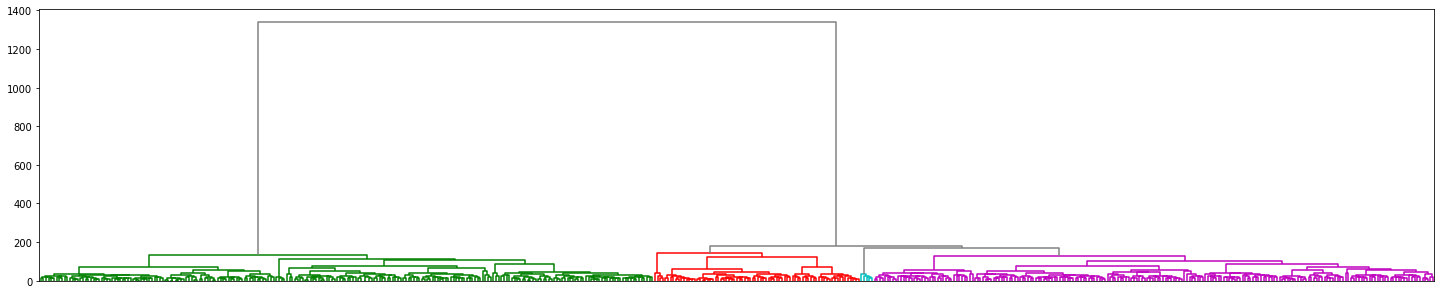

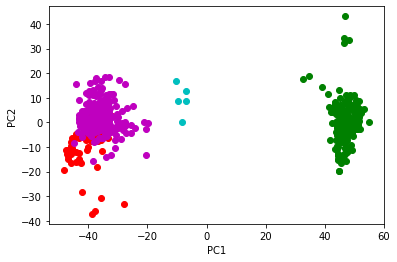

In [13]:
dist_mat_list_0 = np.array(dist_mat_list_0)
dist_mats_0, res_list_0, ind_list_0, inds_fc_0, medoid_ind_list_0 = dist_analy.pca.run(dist_mat_list_0, CDK2_KLIFS_IDENT, 4)

3
K33-E51: 2.264, -22.486

E57-R122: 2.024, -19.313

E51-L78: 3.043, -12.303

E51-F80: 3.147, -11.333

L55-F80: 2.993, -6.235

L55-V64: 3.364, -5.600

S53-V69: 3.034, 5.164

K56-L67: 2.763, 5.097

K56-K65: 2.546, 5.078

[(5, 9, 358, -22.486499061415067), (15, 45, 1019, -19.313318505270956), (9, 28, 639, -12.302679163764811), (9, 30, 641, -11.332944517539293), (13, 30, 887, -6.234790585348119), (13, 21, 878, -5.6000361318802625), (11, 26, 762, 5.164162871197212), (14, 24, 940, 5.096849613019017), (14, 22, 938, 5.078081082034714)]


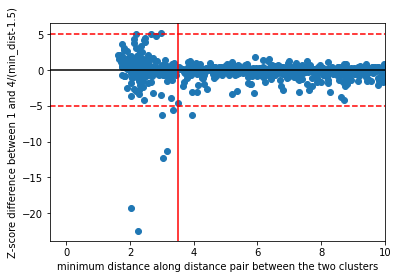

In [14]:
c1 = 0
c2 = 3

feats_0 = dist_analy.pca.triu_flatten(dist_mats_0, res_list_0)
uniprot_sequence = 'MENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIRLDTETEGVPSTAIREISLLKELNHPNIVKLLDVIHTENKLYLVFEFLHQDLKKFMDASALTGIPLPLIKSYLFQLLQGLAFCHSHRVLHRDLKPQNLLINTEGAIKLADFGLARAFGVPVRTYTHEVVTLWYRAPEILLGCKYYSTAVDIWSLGCIFAEMVTRRALFPGDSEIDQLFRIFRTLGTPDEVVWPGVTSMPDYKPSFPKWARQDFSKVVPPLDEDGRSLLSQMLHYDPNKRISAKAALAHPFFQDVTKPVPHLRL'

zscore_0, min_dist_0 = dist_analy.pca.calc_cluster_zscore(inds_fc_0[c1], inds_fc_0[c2], feats_0)
dist_analy.pca.plot_zscore(c1, c2, feats_0, min_dist_0, zscore_0, res_list_0, uniprot_sequence, xcutoff=3.5, top=25)

544


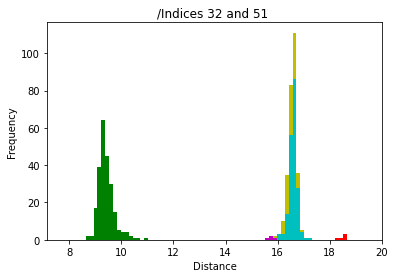

In [96]:
r1 = 32
r2 = 51
plot_stacked_histogram(res_list_0.index(r1),res_list_0.index(r2),dist_mats_0,[res_list_0],inds_fc_0,var=None)
print(XY_getTriu(res_list_0.index(r1),res_list_0.index(r2),len(res_list_0),1))


In [100]:
index = 544
# print(feats_0[:,index])
# print(feats_0[inds_fc_0[c2],index]) ## how to handle this??
print(np.subtract(np.average(feats_0[inds_fc_0[c1], index]), np.average(feats_0[inds_fc_0[c2], index])), np.std(feats_0[inds_fc_0[c1], index], axis=0), np.std(feats_0[inds_fc_0[c2], index], axis=0),np.sqrt(np.multiply(np.std(feats_0[inds_fc_0[c1], index], axis=0),np.std(feats_0[inds_fc_0[c2], index], axis=0))))
val1 = np.divide(np.subtract(np.average(feats_0[inds_fc_0[c1], index]), np.average(feats_0[inds_fc_0[c2], index])), np.sqrt(np.multiply(np.std(feats_0[inds_fc_0[c1], index], axis=0),np.std(feats_0[inds_fc_0[c2], index], axis=0))))
print(val1, np.divide(val1, (np.subtract(np.amin(feats_0[:,index]),1.5))))

-5.880182821221464 0.4124166664895844 0.28746784073822207 0.34432038655911196
-17.077649336955453 -1.1358110951036873


In [107]:
r1 = 33
r2 = 51
# plot_stacked_histogram(CDK2_KLIFS_IDENT.index(r1),CDK2_KLIFS_IDENT.index(r2),dist_mat_list_0,[CDK2_KLIFS_IDENT],inds_fc_0,var=None)
# print(XY_getTriu(CDK2_KLIFS_IDENT.index(r1),CDK2_KLIFS_IDENT.index(r2),len(CDK2_KLIFS_IDENT),1))


r1r2_missing = np.where(dist_mat_list_0[:,CDK2_KLIFS_IDENT.index(r1),CDK2_KLIFS_IDENT.index(r2)]==0)
print(r1r2_missing)
print([dist_mat_pdb_0[x] for x in r1r2_missing[0]])

(array([ 27,  67, 452, 477]),)
['1H01_A', '1OIR_A', '4RJ3_A', '5MHQ_A']


### shortest distance, minimum distance = 2.2 , no adjacent residues

74 [19, 20, 30, 31, 32, 33, 34, 35, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 77, 78, 79, 80, 86, 87, 88, 89, 90, 91, 92, 93, 114, 117, 118, 119, 120, 121, 122, 123, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 139, 142, 143, 144, 165, 167, 168, 169, 171, 174, 185, 187, 190, 192, 195, 262, 274]
3
PCA
link_cols
dendrogram
plot PCA
cluster size: 232 g
cluster size: 78 r
cluster size: 5 c
cluster size: 212 m
[0.8031684 0.0330548]


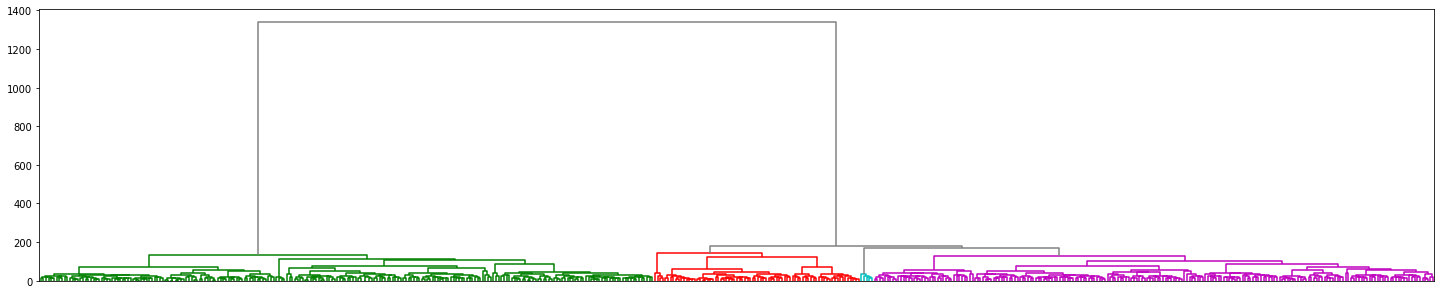

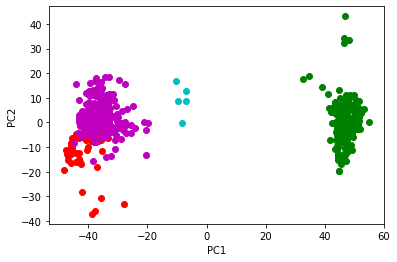

In [15]:
dist_mat_list_1 = np.array(dist_mat_list_1)
dist_mats_1, res_list_1, ind_list_1, inds_fc_1, medoid_ind_list_1 = dist_analy.pca.run(dist_mat_list_1, CDK2_KLIFS_IDENT, 4)

In [28]:
c1 = 0
c2 = 4

feats_1 = dist_analy.pca.triu_flatten(dist_mats_1, res_list_1)
uniprot_sequence = 'MENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIRLDTETEGVPSTAIREISLLKELNHPNIVKLLDVIHTENKLYLVFEFLHQDLKKFMDASALTGIPLPLIKSYLFQLLQGLAFCHSHRVLHRDLKPQNLLINTEGAIKLADFGLARAFGVPVRTYTHEVVTLWYRAPEILLGCKYYSTAVDIWSLGCIFAEMVTRRALFPGDSEIDQLFRIFRTLGTPDEVVWPGVTSMPDYKPSFPKWARQDFSKVVPPLDEDGRSLLSQMLHYDPNKRISAKAALAHPFFQDVTKPVPHLRL'

zscore_1, min_dist_1 = dist_analy.pca.calc_cluster_zscore(inds_fc_1[c1], inds_fc_1[c2], feats_1)
dist_analy.pca.plot_zscore(c1, c2, feats_1, min_dist_1, zscore_1, res_list_1, uniprot_sequence, xcutoff=3.5)

3


IndexError: list index out of range

In [63]:
index = 1182
# print(feats_1[:,index])
print(feats_1[inds_fc_1[c2],index]) ## how to handle this??
print(np.std(feats_1[inds_fc_1[c1], index], axis=0), np.std(feats_1[inds_fc_1[c2], index], axis=0),np.sqrt(np.multiply(np.std(feats_1[inds_fc_1[c1], index], axis=0),np.std(feats_1[inds_fc_1[c2], index], axis=0))))
val1 = np.divide(np.subtract(np.average(feats_1[inds_fc_1[c1], index]), np.average(feats_1[inds_fc_1[c2], index])), np.sqrt(np.multiply(np.std(feats_1[inds_fc_1[c1], index], axis=0),np.std(feats_1[inds_fc_1[c2], index], axis=0))))
print(np.divide(val1, (np.subtract(np.amin(feats_1[:,index]),1.5))))

[2.2 2.2 2.2 2.2]
0.10948591408704136 0.0 0.0
inf


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


### carbon alpha distance, no adjacent residues

73 [19, 20, 30, 31, 32, 34, 35, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 77, 78, 79, 80, 86, 87, 88, 89, 90, 91, 92, 93, 114, 117, 118, 119, 120, 121, 122, 123, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 139, 142, 143, 144, 165, 167, 168, 169, 171, 174, 185, 187, 190, 192, 195, 262, 274]
3
PCA
link_cols
dendrogram
plot PCA
cluster size: 232 g
cluster size: 5 r
cluster size: 156 c
cluster size: 134 m
[0.87466258 0.03588653]


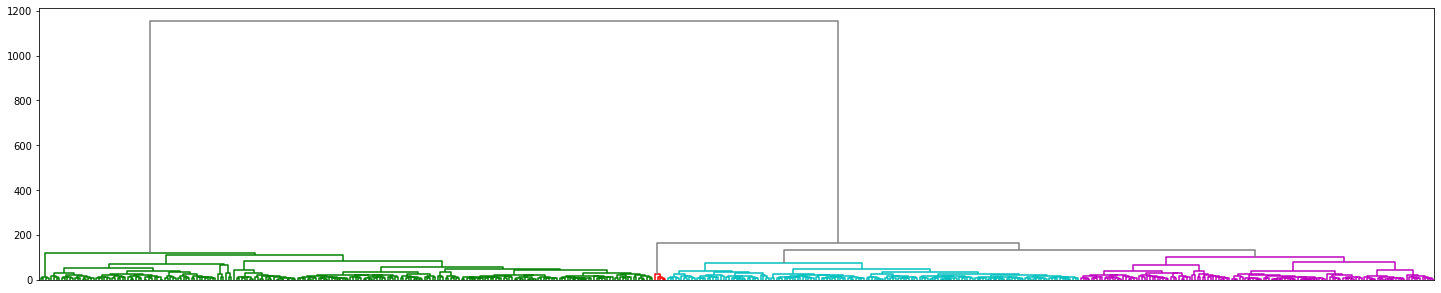

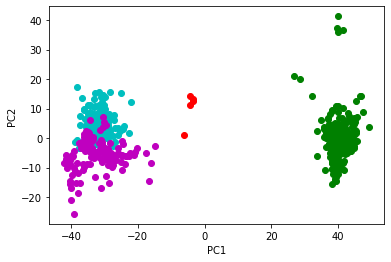

In [21]:
dist_mat_list_2 = np.array(dist_mat_list_2)
dist_mats_2, res_list_2, ind_list_2, inds_fc_2, medoid_ind_list_2 = dist_analy.pca.run(dist_mat_list_2, CDK2_KLIFS_IDENT, 4)

3
S53-V69: 5.891, 2.571

K56-L66: 4.998, 2.291

S53-D68: 7.153, 1.846

L55-K65: 6.625, -1.679

K56-L67: 6.064, 1.635

L55-V64: 7.779, -1.590

E51-L55: 5.368, -1.550

[(10, 25, 689, 2.5707614743715204), (13, 22, 866, 2.290640163435239), (10, 24, 688, 1.8456281316425789), (12, 21, 806, -1.6789425703365135), (13, 23, 867, 1.6346750517140274), (12, 20, 805, -1.590353107140729), (8, 12, 551, -1.549918415634661)]


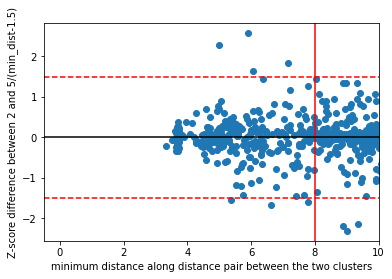

In [39]:
c1 = 0
c2 = 4

feats_2 = dist_analy.pca.triu_flatten(dist_mats_2, res_list_2)
uniprot_sequence = 'MENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIRLDTETEGVPSTAIREISLLKELNHPNIVKLLDVIHTENKLYLVFEFLHQDLKKFMDASALTGIPLPLIKSYLFQLLQGLAFCHSHRVLHRDLKPQNLLINTEGAIKLADFGLARAFGVPVRTYTHEVVTLWYRAPEILLGCKYYSTAVDIWSLGCIFAEMVTRRALFPGDSEIDQLFRIFRTLGTPDEVVWPGVTSMPDYKPSFPKWARQDFSKVVPPLDEDGRSLLSQMLHYDPNKRISAKAALAHPFFQDVTKPVPHLRL'

zscore_2, min_dist_2 = dist_analy.pca.calc_cluster_zscore(inds_fc_2[c1], inds_fc_2[c2], feats_2)
dist_analy.pca.plot_zscore(c1, c2, feats_2, min_dist_2, zscore_2, res_list_2, uniprot_sequence, xcutoff=8, ycutoff=1.5)